# Diabetic retinopathy prediction in patients

#### Business Objective:
#### The variable to be predicted has two values (positive or negative on diabetic retinopathy). Thus, this is a binary classification project. The goal here is to predict whether a patient will suffer from diabetic retinopathy or not, conditioned on blood test features.

Data Set Details:
Target variables has two values in a classification project type: 0 (false) or 1 (true). The number of instances (rows) in the data set is 6000, and the number of variables (columns) is 6.
The following list summarizes the information of the variables:

    1) ID: Numeric
    2) age: (numeric).
    3) systolic_bp: (normal range: below 120mmHg). When the heart beats, it squeezes and pushes blood through the arteries to the rest of the body. This force creates pressure on the blood vessels, and that is the systolic blood pressure.
    4) diastolic_bp: (normal range: lower than 80mmHg). It is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen.
    5) cholesterol: (normal range: between 125 and 200 mg/dl). It is a waxy, fat-like substance found in every cell in the body.
    6) prognosis: (0 or 1) (Target). It is 1 if the patient has retinopathy and 0 if he doesn't.


In [ ]:
#!pip install missingno

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
#df= pd.read_csv(r'C:\Users\DELL\Desktop\New DS projects\Diabetic retinopathy\Datasets\pronostico_dataset (1).csv', sep= ';')
from google.colab import files
uploaded= files.upload()

Saving pronostico_dataset (1).csv to pronostico_dataset (1).csv


In [3]:
df= pd.read_csv('pronostico_dataset (1).csv', sep= ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [4]:
df.head()

ID        age  systolic_bp  diastolic_bp  cholesterol    prognosis
0   0  77.196340    85.288742     80.021878    79.957109  retinopathy
1   1  63.529850    99.379736     84.852361   110.382411  retinopathy
2   2  69.003986   111.349455    109.850616   100.828246  retinopathy
3   3  82.638210    95.056128     79.666851    87.066303  retinopathy
4   4  78.346286   109.154591     90.713220    92.511770  retinopathy

# 1. Data Preprocessing

In [5]:
df.drop('ID', axis= 1, inplace= True)
df.head()

age  systolic_bp  diastolic_bp  cholesterol    prognosis
0  77.196340    85.288742     80.021878    79.957109  retinopathy
1  63.529850    99.379736     84.852361   110.382411  retinopathy
2  69.003986   111.349455    109.850616   100.828246  retinopathy
3  82.638210    95.056128     79.666851    87.066303  retinopathy
4  78.346286   109.154591     90.713220    92.511770  retinopathy

In [6]:
df.prognosis.unique()

array(['retinopathy', 'no_retinopathy'], dtype=object)

In [7]:
# Changing categorical to numerical
df['prognosis'].replace({'retinopathy': 1, 'no_retinopathy': 0}, inplace= True)
df.prognosis.unique()

array([1, 0])

In [8]:
df.head()

age  systolic_bp  diastolic_bp  cholesterol  prognosis
0  77.196340    85.288742     80.021878    79.957109          1
1  63.529850    99.379736     84.852361   110.382411          1
2  69.003986   111.349455    109.850616   100.828246          1
3  82.638210    95.056128     79.666851    87.066303          1
4  78.346286   109.154591     90.713220    92.511770          1

In [9]:
df.isnull().sum()

age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [10]:
df.isna().sum()

age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

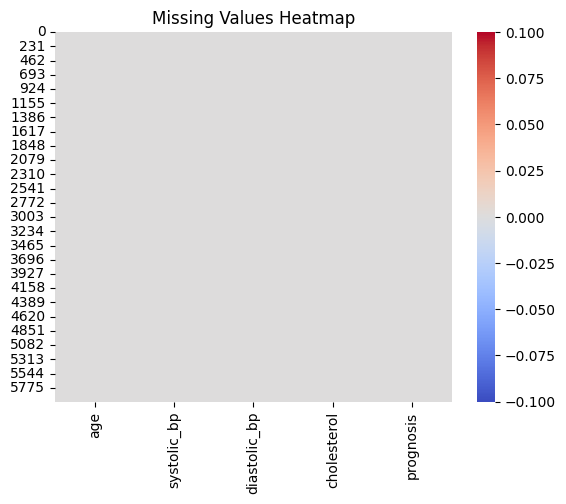

In [12]:
# 1. Missing Values Heatmap
sns.heatmap(df.isnull(), cbar= True, cmap= 'coolwarm')
plt.title("Missing Values Heatmap")
plt.show()

In [13]:
'''msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()'''

'msno.matrix(df)\nplt.title("Missing Values Matrix")\nplt.show()'

bins=30 ;
Bins refer to the number of intervals or "buckets" used to divide the range of data in the histogram.
When you plot a histogram, it divides the continuous data into intervals (bins), and each bin shows how many data points fall within that range.
For example, if you set bins=30, the data is divided into 30 intervals, and you’ll see the frequency of data points within each of those 30 intervals.

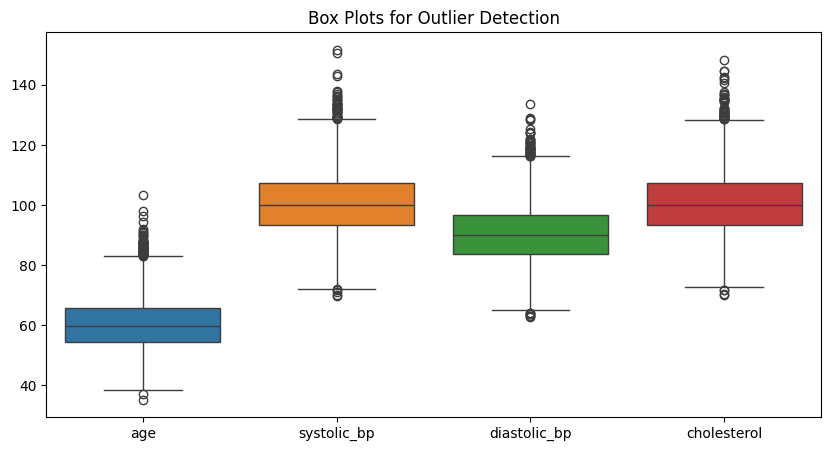

In [14]:
# 3. Box Plots for Outlier Detection
'''for col in df.columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()'''

exclude= ['ID', 'prognosis']
cols_to_plot= [col for col in df.columns if col not in exclude] # It loops over all column names in df.columns. It keeps only those columns not in the exclude list.

# Plot all the boxplots in one figure
plt.figure(figsize= (10,5))
sns.boxplot(data= df[cols_to_plot])
plt.title('Box Plots for Outlier Detection')
#plt.xticks(rotation= 45) # rotates the x-axis labels (tick labels) by 45 degrees.
plt.show()

In [15]:
df.shape

(6000, 5)

In [16]:
for col in cols_to_plot:
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit= Q1 - 1.5 * IQR
    upper_limit= Q3 + 1.5 * IQR

    df= df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

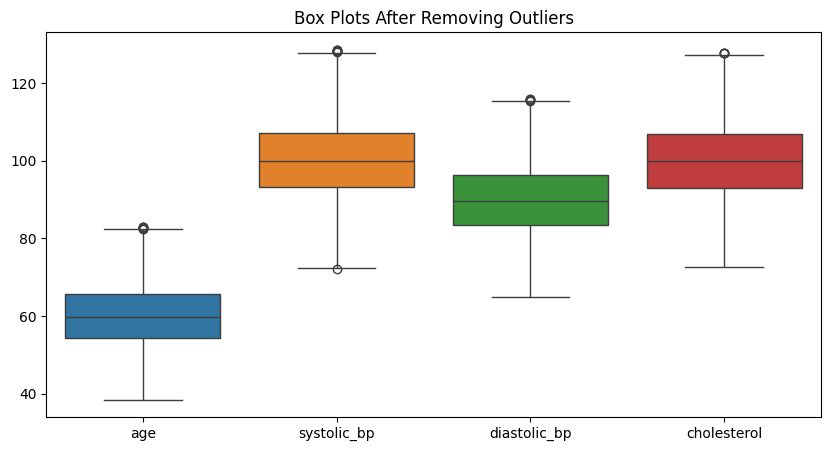

In [17]:
plt.figure(figsize= (10,5))
sns.boxplot(data= df[cols_to_plot])
plt.title('Box Plots After Removing Outliers')
plt.show()

In [18]:
df.shape

(5777, 5)

## Again removing some of the outliers with IQR method


In [19]:
for col in cols_to_plot:
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit= Q1 - 1.5 * IQR
    upper_limit= Q3 + 1.5 * IQR

    df= df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

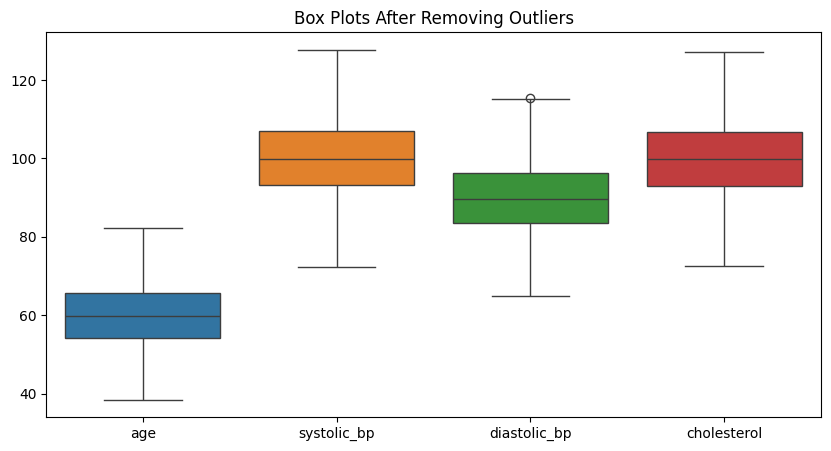

In [20]:
plt.figure(figsize= (10,5))
sns.boxplot(data= df[cols_to_plot])
plt.title('Box Plots After Removing Outliers')
plt.show()

In [21]:
df.shape

(5753, 5)

# 2. EDA

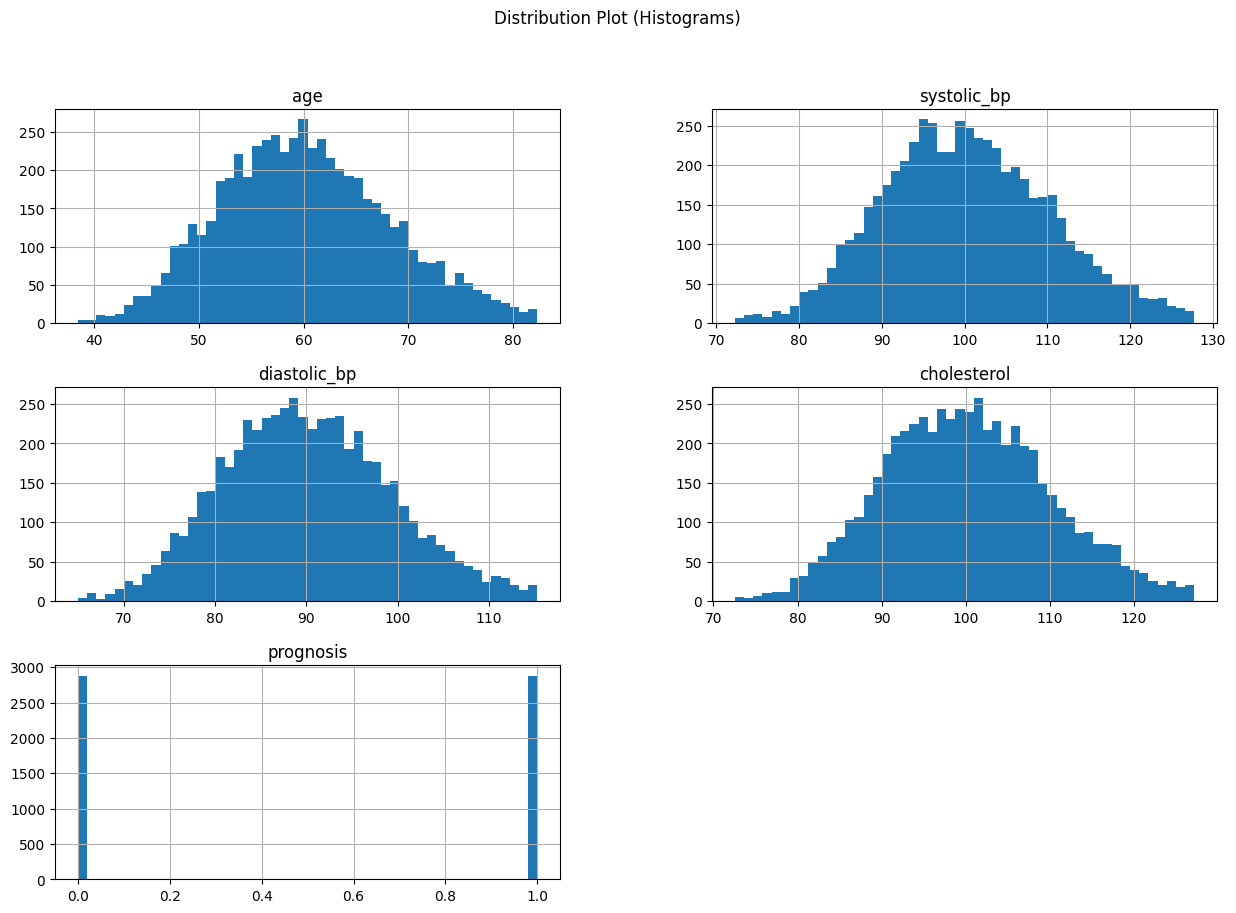

In [22]:
# 2. Distribution plot
df.hist(bins= 50, figsize= (15,10))
plt.suptitle('Distribution Plot (Histograms)')
plt.show()

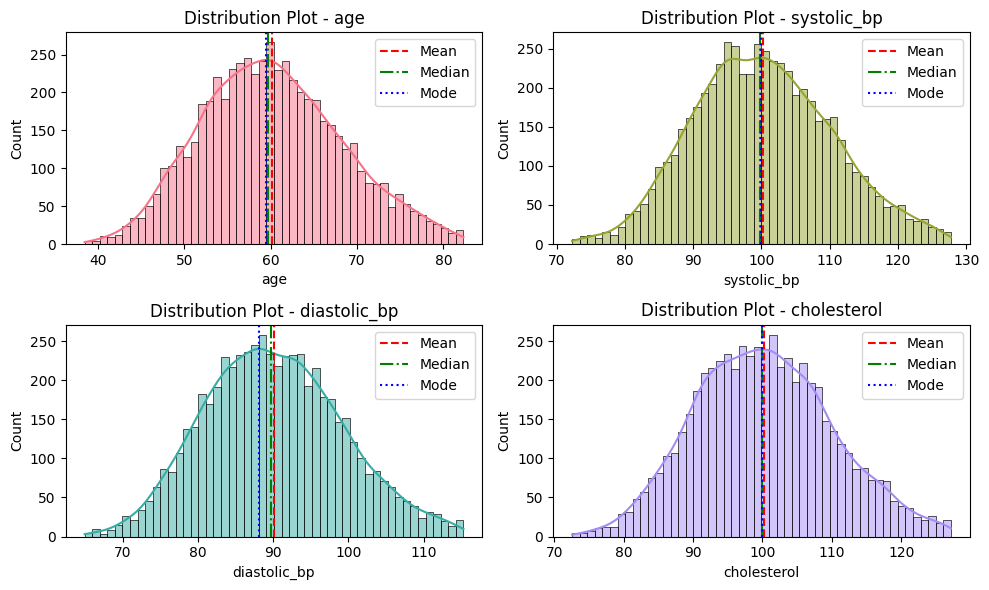

In [ ]:
from scipy.stats import gaussian_kde

colors= sns.color_palette('husl', len(cols_to_plot))

plt.figure(figsize= (10, 3 * ((len(cols_to_plot) + 1) // 2)))
'''
len(cols_to_plot);            This gives you how many histograms you're going to plot — one per column name.
(len(cols_to_plot) + 1) // 2; This calculates how many rows you’ll need if you want 2 plots per row. eg:  if you have 5 columns to plot: (5 + 1) // 2 = 6 // 2 = 3 → You’ll need 3 rows to hold all 5 plots, with 2 per row (last row will have 1).
5 * ...                       Each row is given a height of 5 inches, so total height becomes: number of rows × 5 inches'''

for i, col in enumerate(cols_to_plot, 1): # This loops through each column, and i is the index (starting at 1), while col is the column name.
   plt.subplot((len(cols_to_plot) + 1) // 2, 2, i) # This creates a subplot in a grid layout; plt.subplot(n_rows, n_columns, plot_index)
   sns.histplot(data= df, x= col, bins= 50, kde= True, color= colors[i -1])
   plt.title(f'Distribution Plot - {col}')
  # getting mean, median, mode
   mean= df[col].mean()
   median= df[col].median()
   #mode= df[col].mode()[0]
   # kde mode
   kde = gaussian_kde(df[col].dropna())
   x_val= np.linspace(df[col].min(), df[col].max(), 1000)
   mode= x_val[np.argmax(kde(x_val))]

  # Add vertical lines
   plt.axvline(mean, color= 'red', linestyle= '--', label= 'Mean')
   plt.axvline(median, color= 'green', linestyle= '-.', label= 'Median')
   plt.axvline(mode, color= 'blue', linestyle= ':', label= 'Mode')
   plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df.describe().round(2)
# df.mean()

age  systolic_bp  diastolic_bp  cholesterol  prognosis
count  5753.00      5753.00       5753.00      5753.00     5753.0
mean     60.17       100.25         90.10       100.21        0.5
std       8.11        10.11          9.14         9.89        0.5
min      38.44        72.26         64.94        72.55        0.0
25%      54.29        93.13         83.54        93.04        0.0
50%      59.71        99.80         89.66        99.87        1.0
75%      65.53       107.08         96.24       106.86        1.0
max      82.33       127.76        115.31       127.17        1.0

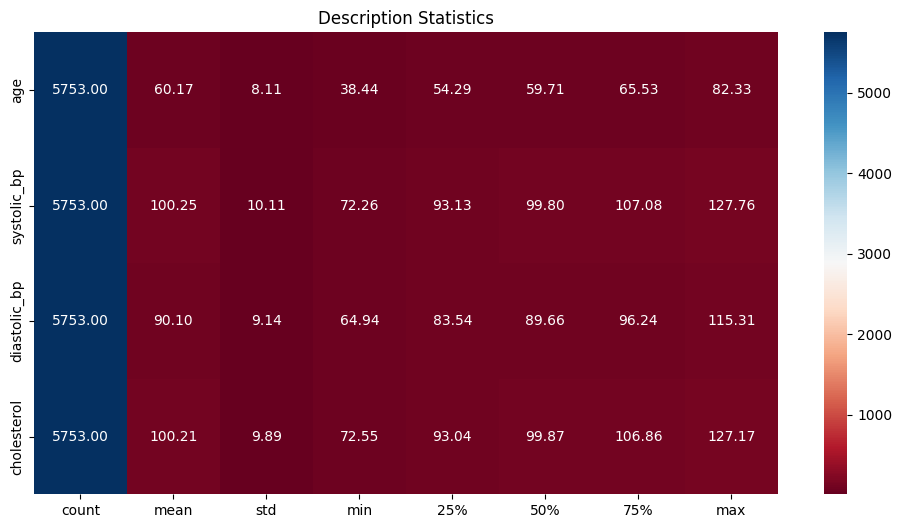

In [ ]:
desc= df.drop(['prognosis'], axis= 1).describe().round(2).T # Transpose for better readability
plt.figure(figsize= (12,6))
sns.heatmap(desc, annot= True, cmap= 'RdBu', cbar= True, fmt= '.2f')
plt.title('Description Statistics')
plt.show()

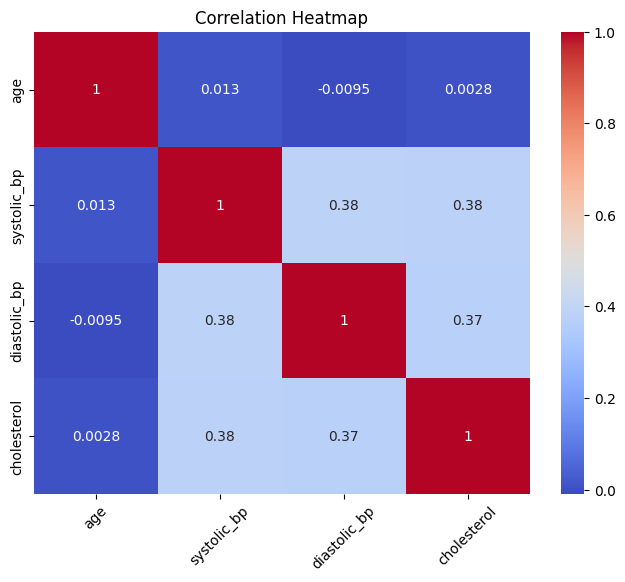

In [ ]:
# Correlation Heatmap
plt.figure(figsize= (8, 6))
sns.heatmap(df[cols_to_plot].corr(), annot= True, cmap= 'coolwarm', cbar= True)
plt.title('Correlation Heatmap')
plt.xticks(rotation= 45) # rotates the x-axis labels (tick labels) by 45 degrees.
plt.show()

In [ ]:
df.corr()

age  systolic_bp  diastolic_bp  cholesterol  prognosis
age           1.000000     0.012875     -0.009467     0.002845   0.378977
systolic_bp   0.012875     1.000000      0.384548     0.377880   0.328295
diastolic_bp -0.009467     0.384548      1.000000     0.372070   0.168332
cholesterol   0.002845     0.377880      0.372070     1.000000   0.305941
prognosis     0.378977     0.328295      0.168332     0.305941   1.000000

In [ ]:
df.head()

age  systolic_bp  diastolic_bp  cholesterol  prognosis
0  77.196340    85.288742     80.021878    79.957109          1
1  63.529850    99.379736     84.852361   110.382411          1
2  69.003986   111.349455    109.850616   100.828246          1
4  78.346286   109.154591     90.713220    92.511770          1
5  52.181782   121.080264    110.488129   115.468279          1

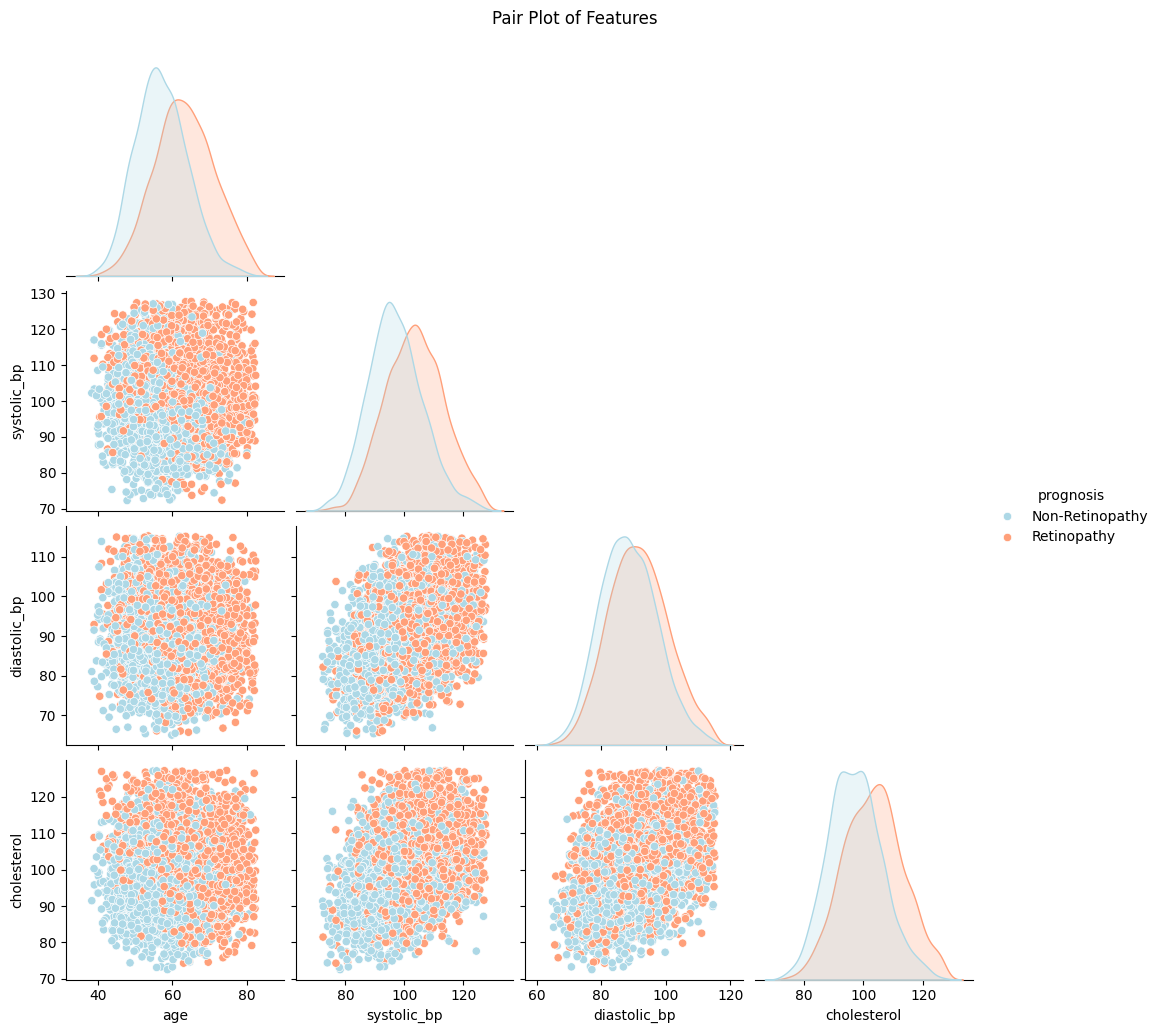

<Figure size 800x400 with 0 Axes>

"sns.pairplot(df[cols_to_plot])\nplt.suptitle('Pairplot: Multivariate Relationships')\nplt.show()"

In [ ]:
label_map= {0: 'Non-Retinopathy', 1: 'Retinopathy'}

pair_plot= df.copy()
pair_plot['prognosis']= df['prognosis'].map(label_map).astype('category')
palette = {'Non-Retinopathy': 'lightblue', 'Retinopathy': 'lightsalmon'}

sns.pairplot(pair_plot, hue= 'prognosis', palette= palette, corner= True)
plt.suptitle('Pair Plot of Features', y= 1.03)
plt.figure(figsize= (8,4))
plt.show()

# Pairplot(Multivariate Relationships)
'''sns.pairplot(df[cols_to_plot])
plt.suptitle('Pairplot: Multivariate Relationships')
plt.show()'''

In [ ]:
from scipy.stats import skew, kurtosis

for col in cols_to_plot:
  print(f'{col} - Skewness {skew(df[col]):.2f}, -Kurtosis {kurtosis(df[col]):.2f} ')

age - Skewness 0.23, -Kurtosis -0.32 
systolic_bp - Skewness 0.17, -Kurtosis -0.28 
diastolic_bp - Skewness 0.19, -Kurtosis -0.27 
cholesterol - Skewness 0.18, -Kurtosis -0.28 


All skewness values are close to 0 (between -0.5 and 0.5):

➤ This means the distributions are fairly symmetrical — no serious skew.

All kurtosis values are slightly negative:

➤ Slightly flatter than a normal distribution (called platykurtic), but nothing concerning.

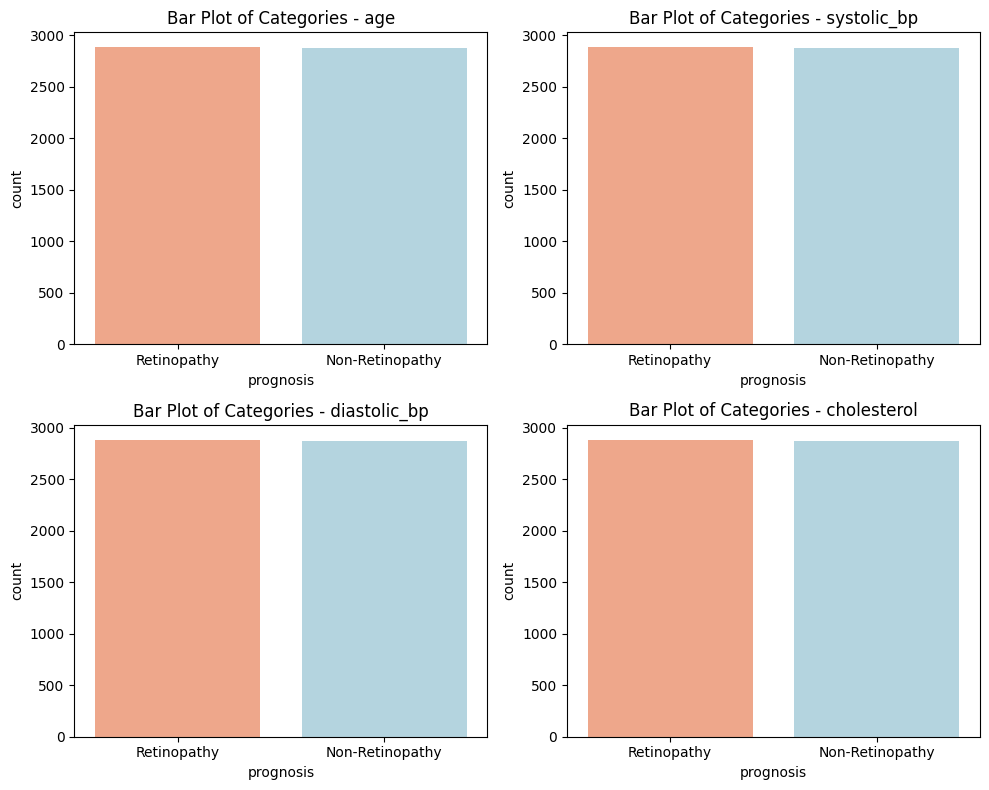

In [ ]:
# Bar Plot.
#colors= sns.color_palette('husl', (len(cols_to_plot)))
label_map = {0: 'Non-Retinopathy', 1: 'Retinopathy'}
plt.figure(figsize= (10, 4 * ((len(cols_to_plot) + 1) // 2)))
palette= {'Non-Retinopathy': 'lightblue', 'Retinopathy': 'lightsalmon'}

for i, col in enumerate(cols_to_plot, 1):
  plt.subplot((len(cols_to_plot) + 1) // 2, 2, i)
  sns.countplot(data= df, x= df['prognosis'].map(label_map), palette= palette)
  #plt.xticks(rotation= 45)
  plt.title(f'Bar Plot of Categories - {col}')

plt.tight_layout()
plt.show();

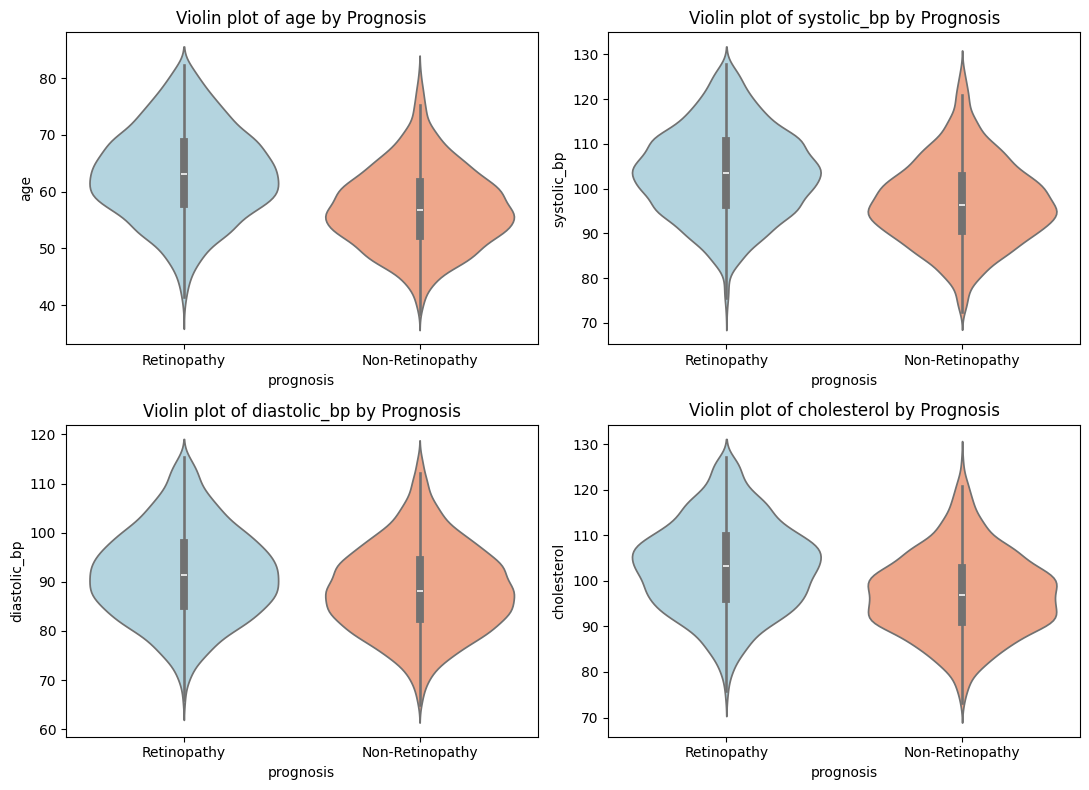

In [ ]:
# Violin Plot
label_map= {0: 'Non-Retinopathy', 1: 'Retinopathy'}

palette= {'Non-Retinopathy': 'lightsalmon', 'Retinopathy': 'lightblue'}
plt.figure(figsize= (11, 4 *((len(cols_to_plot) + 1) // 2)))

for i, col in enumerate(cols_to_plot, 1):
  plt.subplot((len(cols_to_plot)+1)//2, 2, i)
  sns.violinplot(data= df, x= df['prognosis'].map(label_map), y= col, palette= palette)
  plt.title(f'Violin plot of {col} by Prognosis')

plt.tight_layout()
plt.show()

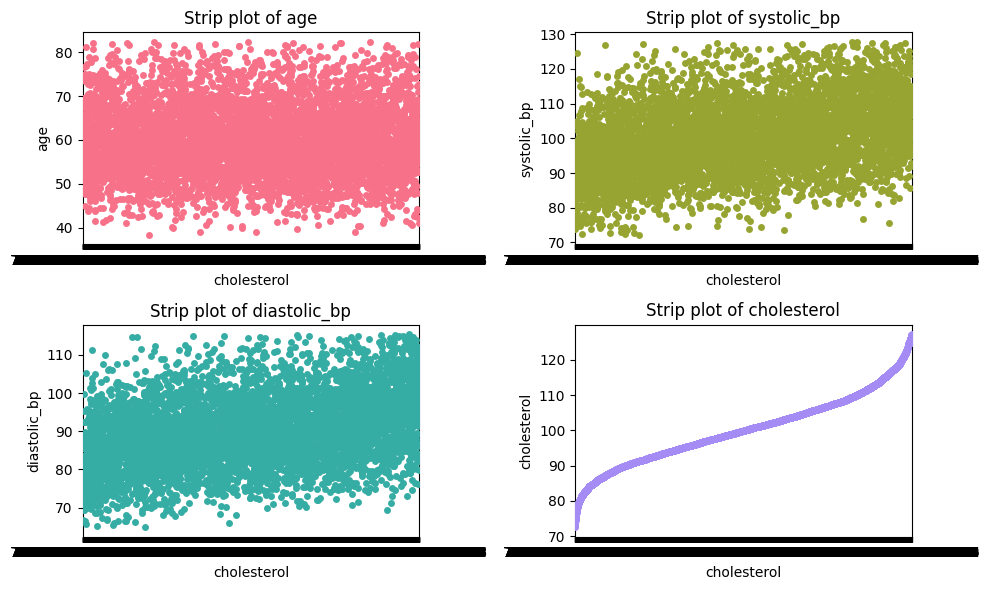

In [ ]:
# Strip Plot
colors= sns.color_palette('husl', len(cols_to_plot))
plt.figure(figsize= (10, 3 * ((len(cols_to_plot) + 1) // 2)))

for i, col in enumerate(cols_to_plot, 1):
  plt.subplot((len(cols_to_plot)+1) //2, 2, i)
  sns.stripplot(data= df, x= df['cholesterol'], y= col, jitter= True, color= colors[i -1])
  plt.title(f'Strip plot of {col}')

plt.tight_layout()
plt.show()

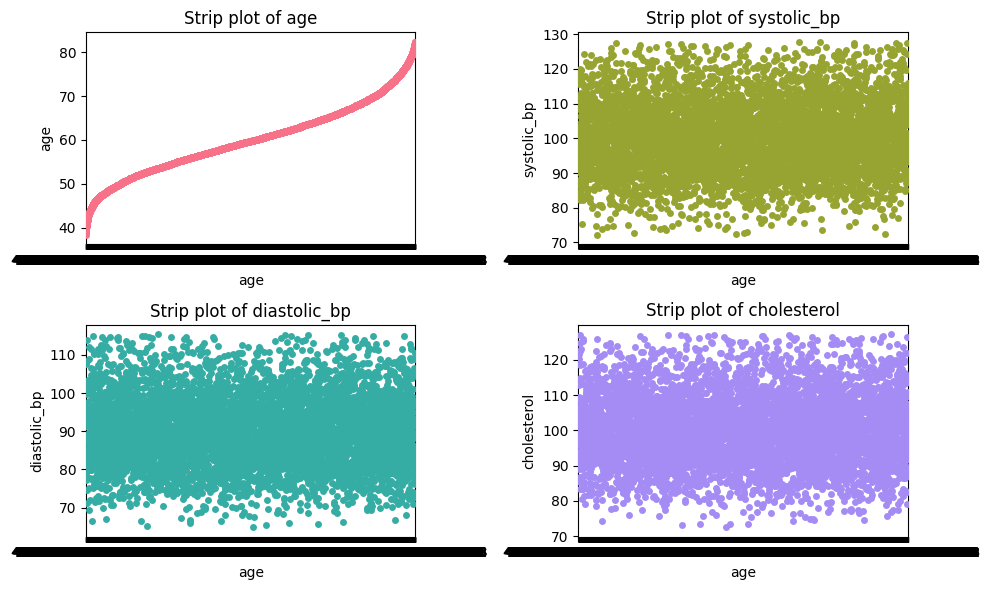

In [ ]:
# Swarm Plot
colors= sns.color_palette('husl', len(cols_to_plot))
plt.figure(figsize= (10, 3 * ((len(cols_to_plot) + 1) // 2)))

for i, col in enumerate(cols_to_plot, 1):
  plt.subplot((len(cols_to_plot)+1) //2, 2, i)
  sns.stripplot(data= df, x= df['age'], y= col, jitter= True, color= colors[i -1])
  plt.title(f'Strip plot of {col}')

plt.tight_layout()
plt.show()

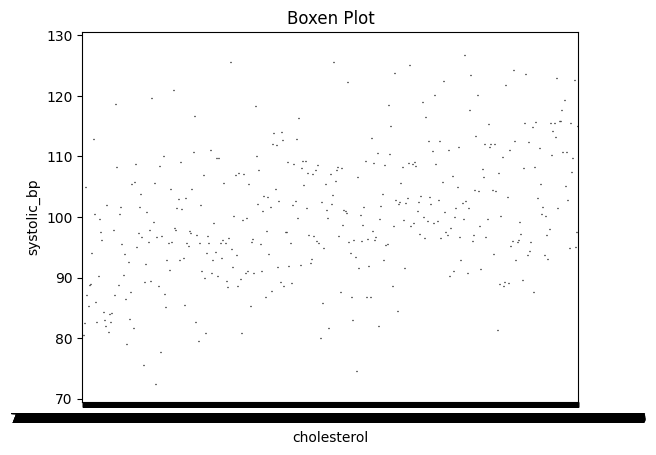

In [ ]:
# Boxen Plot (Good for Large Data)
sns.boxenplot(data= df, x=df['cholesterol'], y= df['systolic_bp'])
plt.title('Boxen Plot')
plt.show()

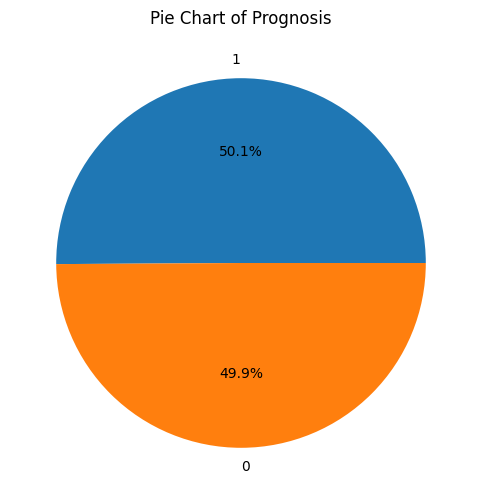

In [ ]:
# Pie Chart
df['prognosis'].value_counts().plot.pie(autopct= '%1.1f%%', figsize= (6,6))
plt.title("Pie Chart of Prognosis")
plt.ylabel('')
plt.show()

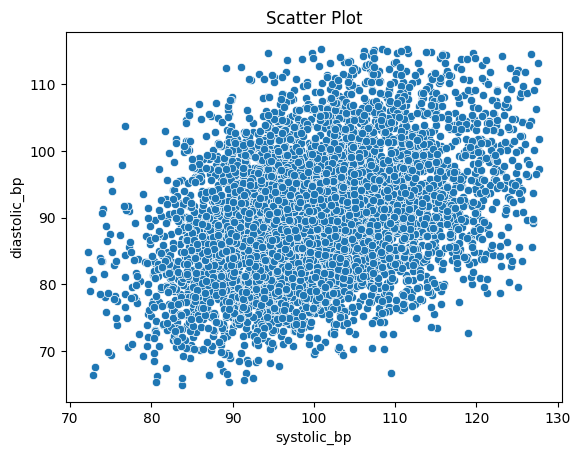

In [ ]:
# Scatter Plot
sns.scatterplot(data= df, x= df['systolic_bp'], y= df['diastolic_bp'])
plt.title('Scatter Plot')
plt.show()

"\n  # Plot kde per class with darker color\n  for label in joint_plot['prognosis'].unique():\n    sub_data= joint_plot[joint_plot['prognosis']== label]\n    sns.kdeplot(data= sub_data, x= 'systolic_bp', y= col, ax= g.ax_joint, color= kde_palette[label], level= 6, zorder= 5)"

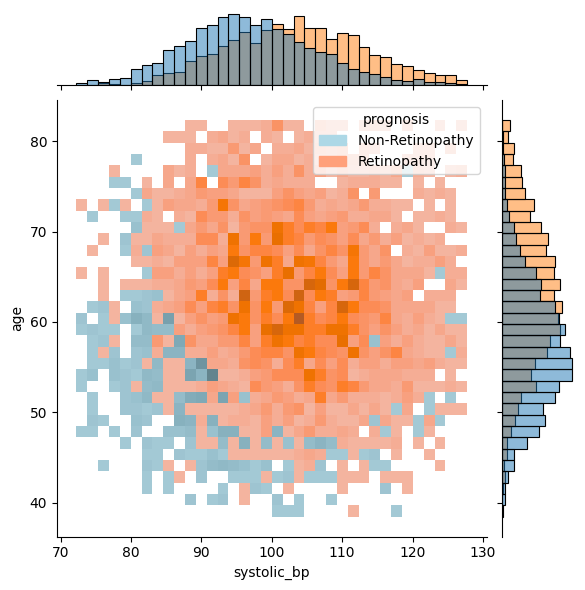

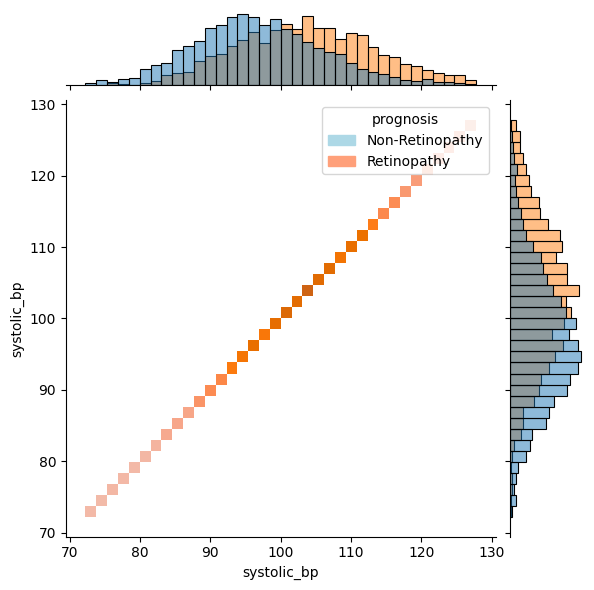

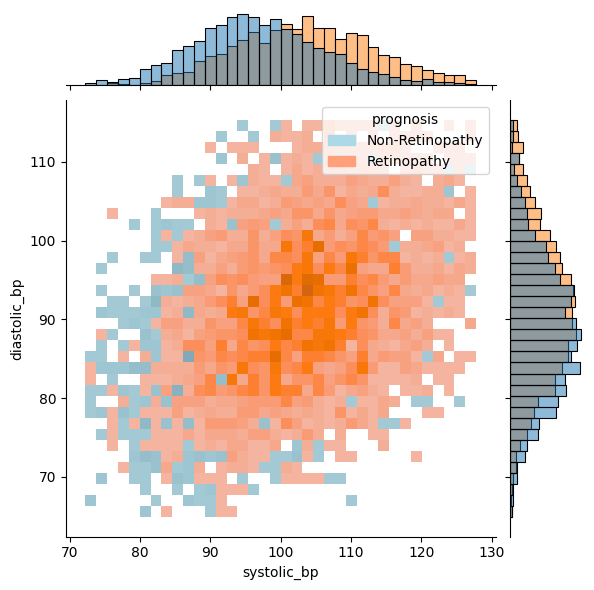

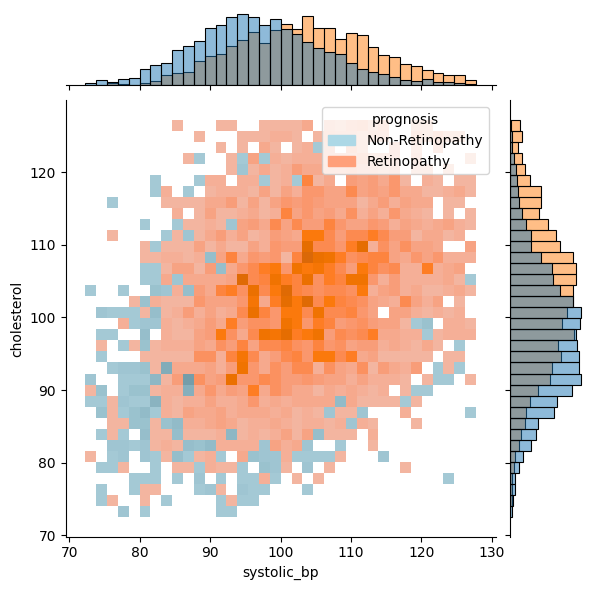

In [ ]:
label_map= {0: 'Non-Retinopathy', 1: 'Retinopathy'}
joint_plot = df.copy()
joint_plot['prognosis']= joint_plot['prognosis'].map(label_map).astype('category')
scatter_palette= {'Non-Retinopathy': 'lightblue', 'Retinopathy': 'lightsalmon'}
#kde_palette= {'Non-Retinopathy': 'blue', 'Retinopathy': 'red'}

for col in cols_to_plot:
  sns.jointplot(data= joint_plot, x= 'systolic_bp', y= col, kind= 'hist', hue= 'prognosis', palette= scatter_palette)
  plt.title(f'Joint Plot - systolic_bp vs {col}', y= 1.03)
  plt.xlabel('systolic_bp')
  plt.ylabel(col)
'''
  # Plot kde per class with darker color
  for label in joint_plot['prognosis'].unique():
    sub_data= joint_plot[joint_plot['prognosis']== label]
    sns.kdeplot(data= sub_data, x= 'systolic_bp', y= col, ax= g.ax_joint, color= kde_palette[label], level= 6, zorder= 5)'''



"\nsns.jointplot(data= df, x= df['systolic_bp'], y= df['cholesterol'], kind= 'scatter')\nplt.title('Joint Plot')\nplt.show()\n\nsns.jointplot(data= df, x= df['systolic_bp'], y= df['diastolic_bp'], kind= 'scatter')\nplt.title('Joint Plot')\nplt.show()"

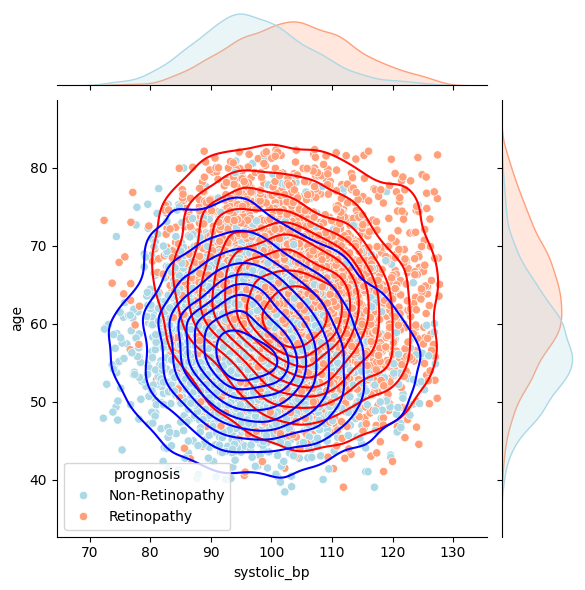

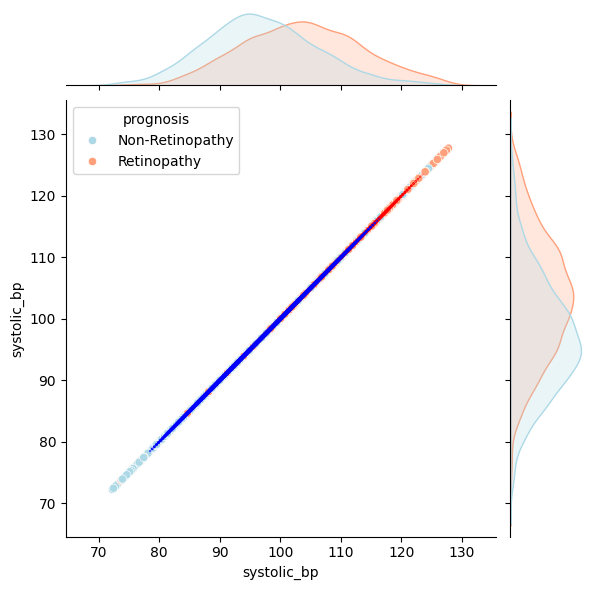

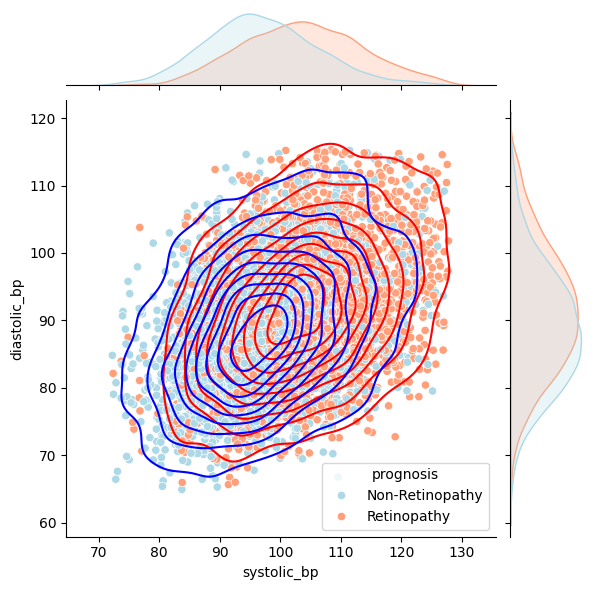

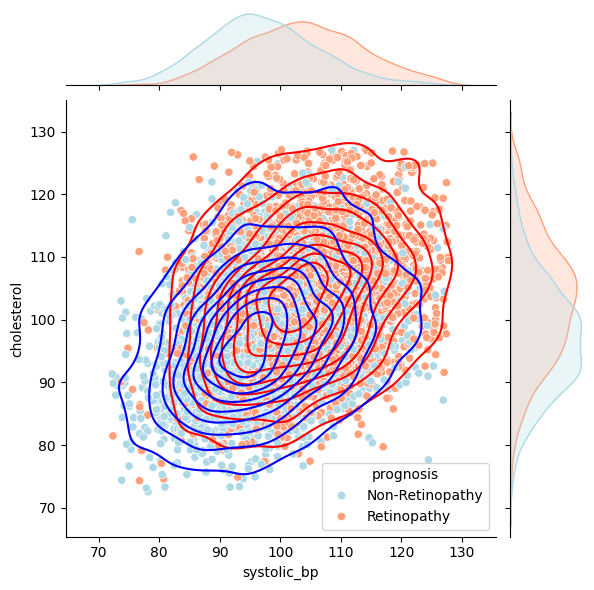

In [ ]:
# Joint Plot(2D Distribution + Histograms)
joint_plot = df.copy()
joint_plot['prognosis']= joint_plot['prognosis'].map(label_map).astype('category')
scatter_palette= {'Non-Retinopathy': 'lightblue', 'Retinopathy': 'lightsalmon'}
kde_palette= {'Non-Retinopathy': 'blue', 'Retinopathy': 'red'}

for col in cols_to_plot:
  g= sns.jointplot(data= joint_plot, x= 'systolic_bp', y= col, kind= 'scatter', hue= 'prognosis', palette= scatter_palette)

  # Plot kde per class with darker color
  for label in joint_plot['prognosis'].unique():
    sub_data= joint_plot[joint_plot['prognosis']== label]
    sns.kdeplot(data= sub_data, x= 'systolic_bp', y= col, ax= g.ax_joint, color= kde_palette[label], level= 6, zorder= 5)

  g.ax_joint.set_title(f'Joint Plot - systolic_bp vs {col}', y= 1.03)
  g.ax_joint.set_xlabel('systolic_bp')
  g.ax_joint.set_ylabel(col)

#plt.tight_layout()
#plt.show()

'''
sns.jointplot(data= df, x= df['systolic_bp'], y= df['cholesterol'], kind= 'scatter')
plt.title('Joint Plot')
plt.show()

sns.jointplot(data= df, x= df['systolic_bp'], y= df['diastolic_bp'], kind= 'scatter')
plt.title('Joint Plot')
plt.show()'''

<function matplotlib.pyplot.show(close=None, block=None)>

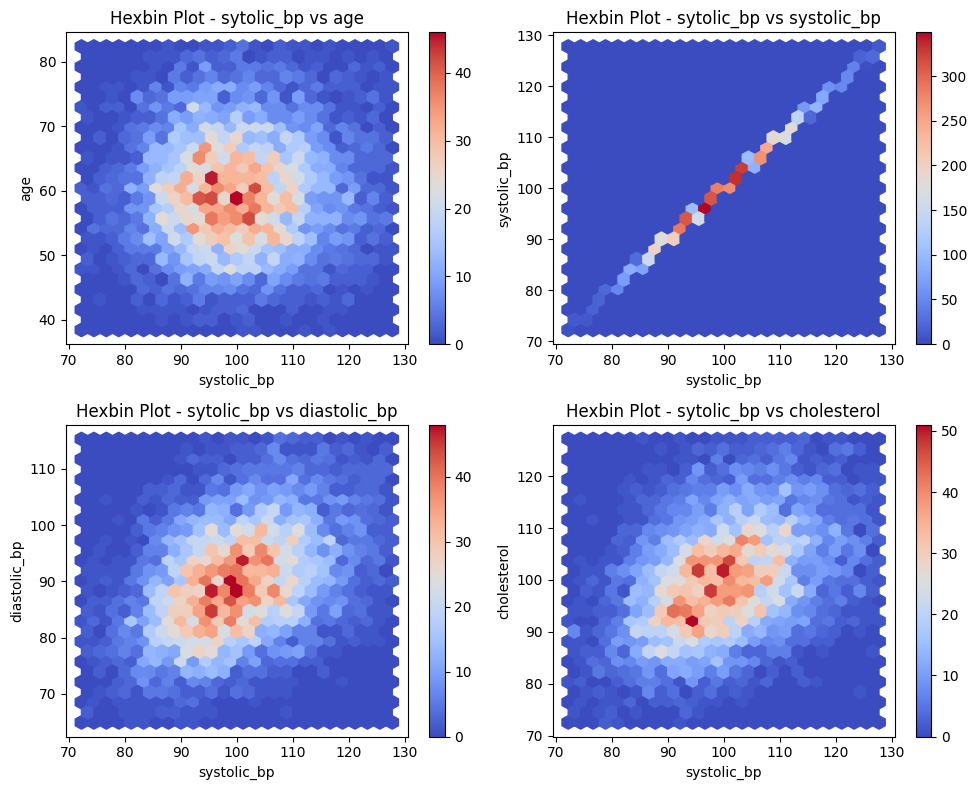

In [ ]:
# Hexbin Plot (For Dense Scatter Data)
plt.figure(figsize= (10, 4 * ((len(cols_to_plot) + 1) //2)))

for i, col in enumerate(cols_to_plot, 1):
  ax= plt.subplot((len(cols_to_plot)+ 1)// 2, 2, i)
  df.plot.hexbin(x='systolic_bp', y= col, gridsize= 25, cmap= 'coolwarm', ax= ax)
  plt.title(f'Hexbin Plot - sytolic_bp vs {col}')
  plt.xlabel('systolic_bp')
  plt.ylabel(col)

plt.tight_layout()
plt.show

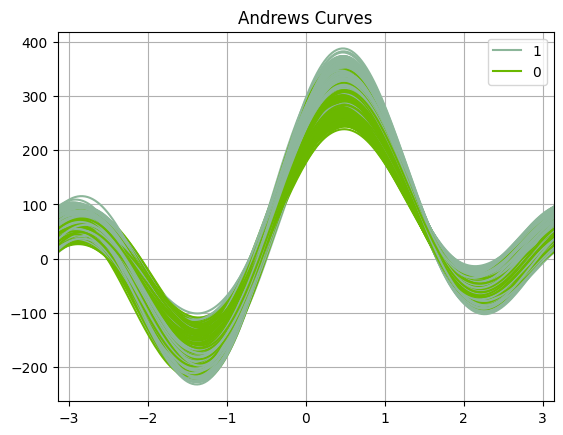

In [ ]:
# Andrew Curves (High-Dimensional Data Visualisation)
from pandas.plotting import andrews_curves

andrews_curves(df, 'prognosis')
plt.title('Andrews Curves')
plt.show()

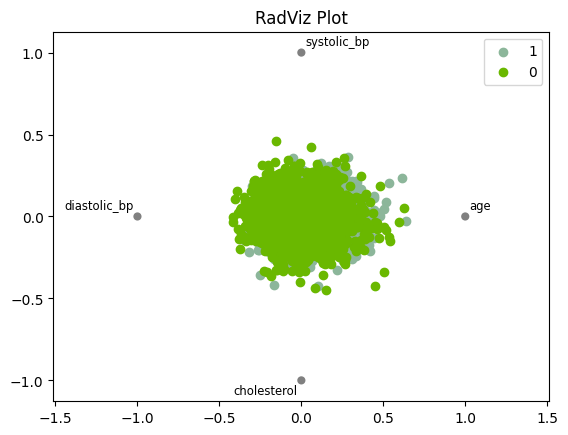

In [ ]:
# RadViz Plot
from pandas.plotting import radviz

radviz(df, 'prognosis')
plt.title('RadViz Plot')
plt.show()

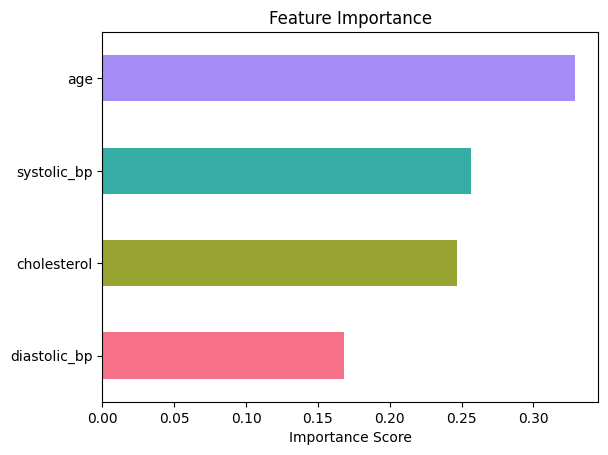

In [ ]:
# Heatmap of Feature Importance (Optional with ML)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(df.drop('prognosis', axis= 1), df['prognosis'])
'''X → df.drop('target', axis=1) → drops the target column from the DataFrame so you're left with just the input features. y → df['prognosis'] → the target column you're trying to predict.
.fit(X, y) → trains the model using features X and target y.'''

feat_imp= pd.Series(model.feature_importances_, index= df.drop('prognosis', axis= 1).columns)
'''model.feature_importances_ → After fitting a tree-based model, this gives you an array of importance scores, one for each input feature. Higher values = more important for predicting the target (prognosis).
df.drop('prognosis', axis=1).columns → You drop the target column ('prognosis') to get only the feature columns. .columns → gives you the names of those columns — used as labels.'''

colors= sns.color_palette('husl', len(feat_imp))

feat_imp.sort_values().plot.barh(color= colors) # .sort_values() → sorts the features from least to most important. .plot(kind='barh') → horizontal bar plot for cleaner visualization (especially if feature names are long).
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.show()

In [ ]:
#!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

profile= ProfileReport(df, title= 'Full Report EDA', explorative= True)
profile.to_notebook_iframe() # .to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 23.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

features= df.drop('prognosis', axis= 1)

# Fitting the scaler
scaler= StandardScaler()
scaled_array= scaler.fit_transform(features)

In [24]:
# Convert back to Dataframe
df_scaled= pd.DataFrame(scaled_array, columns= features.columns, index= features.index)

In [25]:
# If you need the 'prognosis' column attached for training
df_scaled['prognosis']= df['prognosis']

In [26]:
df_scaled.isna().sum()

age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [27]:
df['prognosis'].equals(df_scaled['prognosis']) # If you ever want to double-check that prognosis wasn't changed:

True

In [28]:
df_scaled

age  systolic_bp  diastolic_bp  cholesterol  prognosis
0     2.099638    -1.479443     -1.103049    -2.047474          1
1     0.413923    -0.086053     -0.574321     1.028579          1
2     1.089139     1.097573      2.161903     0.062636          1
4     2.241480     0.880534      0.067189    -0.778175          1
5    -0.985823     2.059805      2.231683     1.542769          1
...        ...          ...           ...          ...        ...
5995 -1.302816    -0.533221     -0.381315     0.751719          0
5996  0.360863    -0.020810      0.373883     0.481516          1
5997 -0.568855    -0.180814      1.378988     2.089495          1
5998  0.406412     0.648619     -0.223155     0.590788          1
5999  0.287736    -0.331185     -0.352598     0.850946          0

[5753 rows x 5 columns]

# Saving the Scaled data for deployment.

In [ ]:
import joblib

# Saving the best estimator from GridSearchCV
joblib.dump(scaler, 'scaler.pkl')

print("Model Saved successfully as 'scaler.pkl'")

Model Saved successfully as 'scaler.pkl'


# Splitting data

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV

X= df_scaled.drop(['prognosis', 'diastolic_bp'], axis= 1)
y= df_scaled['prognosis']

# Split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

# Model Building  
## Classification Models

## 1. Naive Bayes Classifier

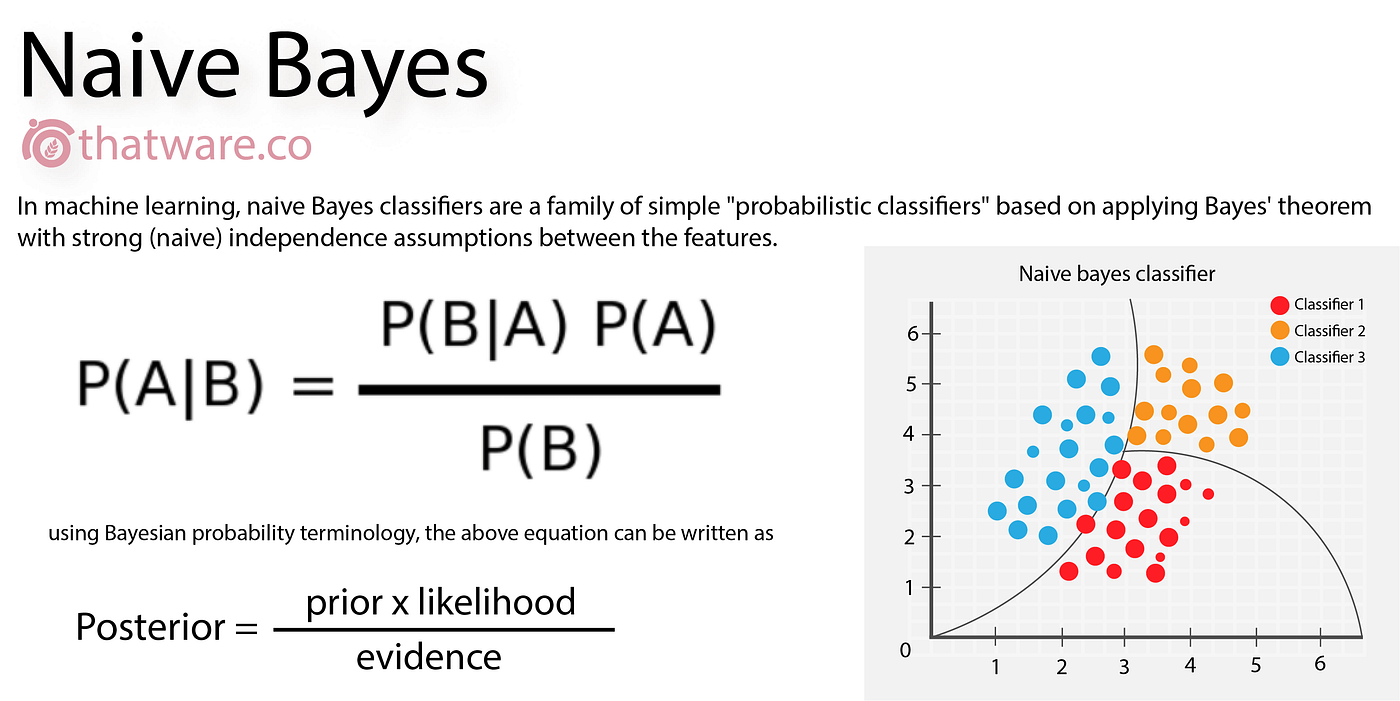

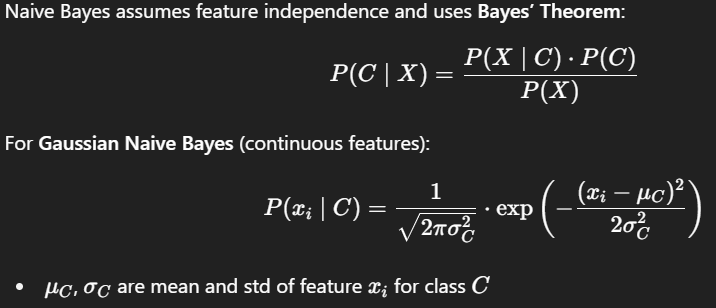

In [32]:
# Naive Bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

nb_model= GaussianNB()
nb_model.fit(X_train, y_train)
y_pred= nb_model.predict(X_test)
accuracy_nb= accuracy_score(y_test, y_pred)

print('Naive Bayes\n', classification_report(y_test, y_pred), 'Accuracy: ', accuracy_nb)

Naive Bayes
               precision    recall  f1-score   support

           0       0.69      0.80      0.74       554
           1       0.78      0.67      0.72       597

    accuracy                           0.73      1151
   macro avg       0.74      0.73      0.73      1151
weighted avg       0.74      0.73      0.73      1151
 Accuracy:  0.731537793223284


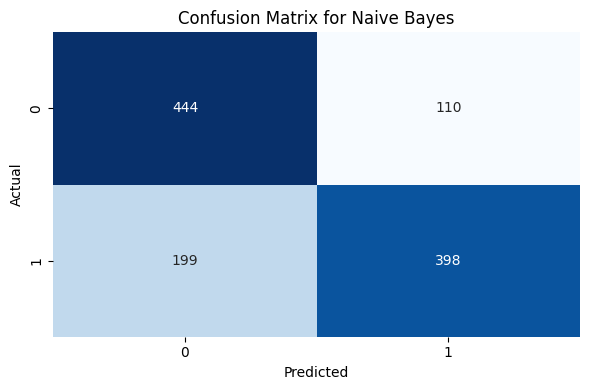

In [ ]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', cbar= False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 2. Logistic Regression

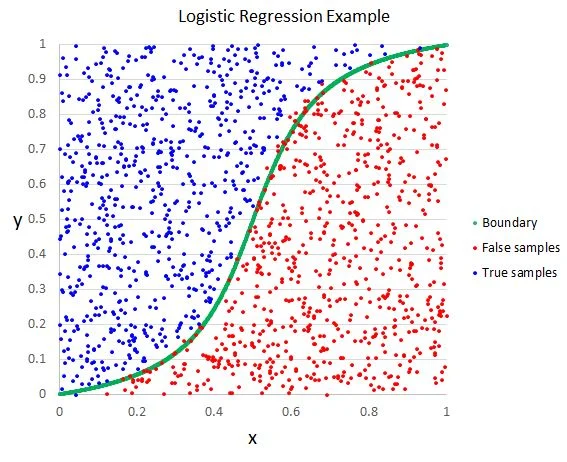

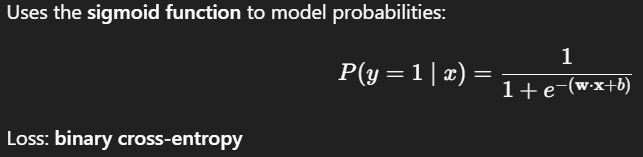

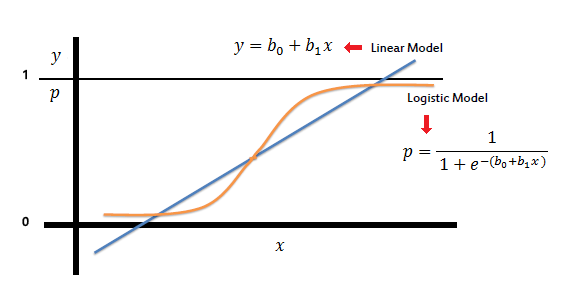

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid= {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

logreg= LogisticRegression(max_iter= 1000)
grid_logreg= GridSearchCV(logreg, param_grid, cv= 5)
grid_logreg.fit(X_train, y_train)
y_pred= grid_logreg.predict(X_test)

accuracy_lr= accuracy_score(y_test, y_pred)

print('Best Params: ', grid_logreg.best_params_)
print('Logistic Regression:\n', classification_report(y_test, y_pred ), 'Accuracy: ', accuracy_lr)

Best Params:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression:
               precision    recall  f1-score   support

           0       0.69      0.79      0.73       554
           1       0.77      0.67      0.72       597

    accuracy                           0.73      1151
   macro avg       0.73      0.73      0.73      1151
weighted avg       0.73      0.73      0.73      1151
 Accuracy:  0.7263249348392702


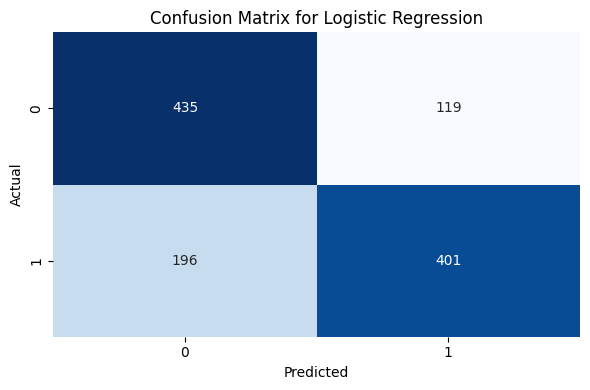

In [ ]:
cm= confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', cbar= False)

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 3. Decision Tree

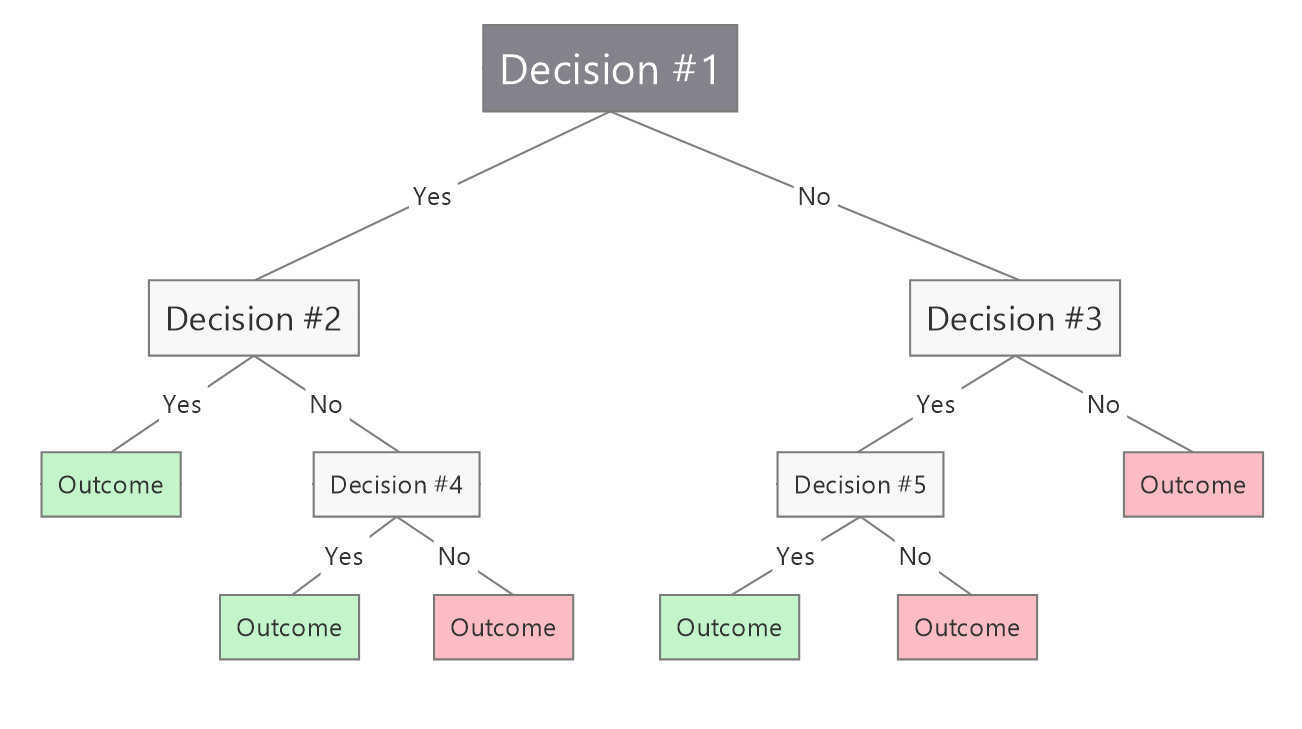

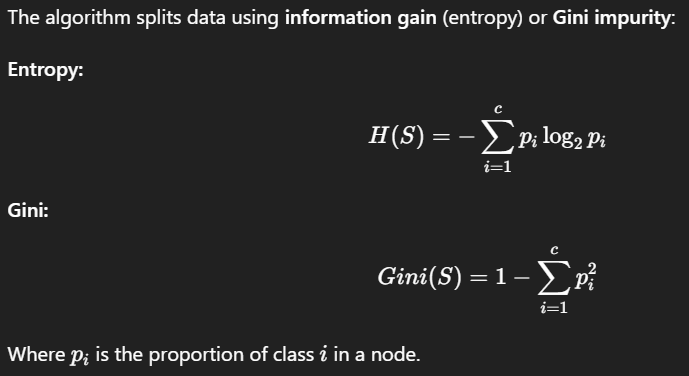

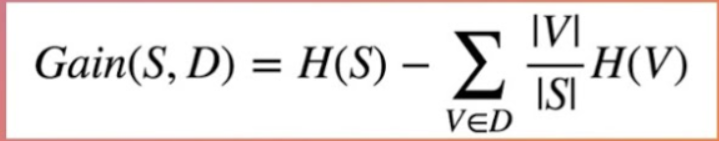

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_dt= {
    'max_depth': [3,5,10, None],
    'min_samples_split': [2,5,10],
    'criterion': ['gini', 'entropy']
}

grid_dt= GridSearchCV(DecisionTreeClassifier(random_state= 42), param_dt, cv= 5, n_jobs= -1, verbose= 1)
grid_dt.fit(X_train, y_train)
y_pred= grid_dt.predict(X_test)

accuracy_dt= accuracy_score(y_test, y_pred)

print('Decision Tree\n', classification_report(y_test, y_pred), 'Accuracy:', accuracy_dt)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Decision Tree
               precision    recall  f1-score   support

           0       0.68      0.81      0.74       554
           1       0.78      0.64      0.70       597

    accuracy                           0.72      1151
   macro avg       0.73      0.72      0.72      1151
weighted avg       0.73      0.72      0.72      1151
 Accuracy: 0.7202432667245873


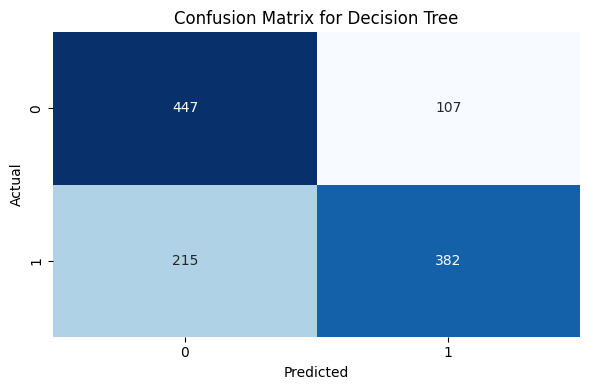

In [ ]:
cm= confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', cbar= False)

plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 4. Random Forest

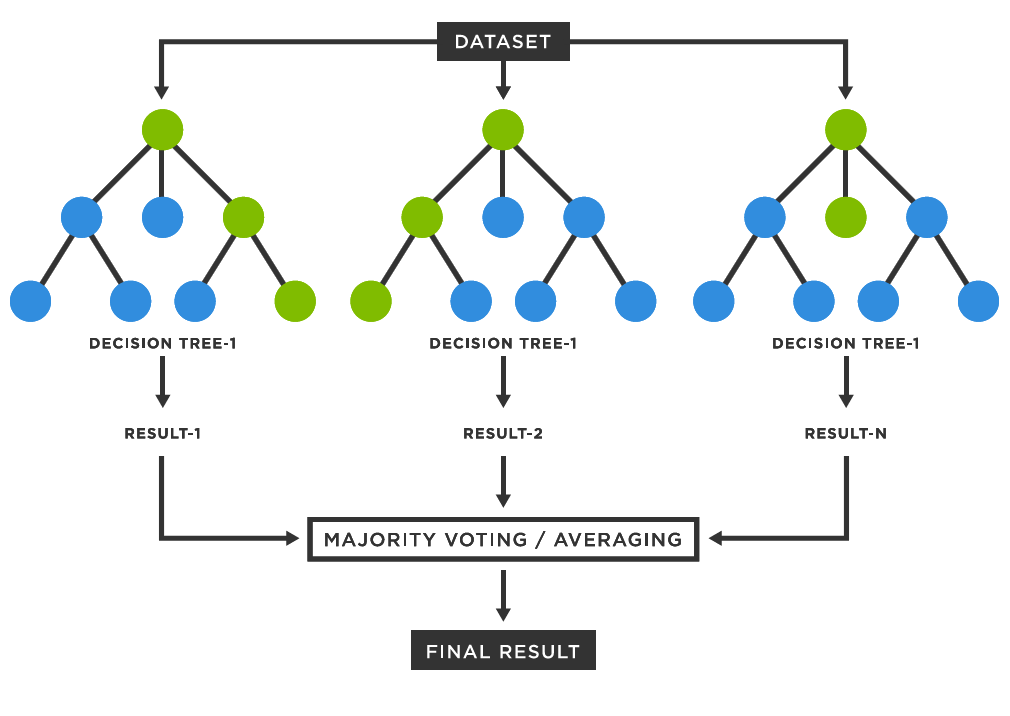

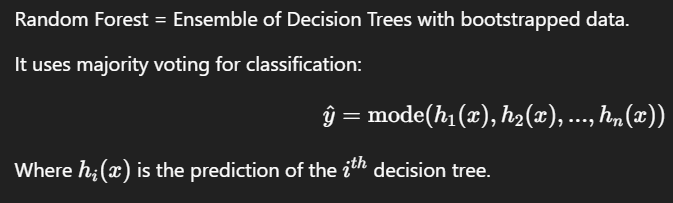

In [ ]:

from sklearn.ensemble import RandomForestClassifier

param_rf= {
    'n_estimators': [50, 100],
    'max_depth': [3,5,10,20, None],
    'min_samples_split': [2,5,10],
    'criterion': ['gini', 'entropy']
}

grid_rf= GridSearchCV(RandomForestClassifier(random_state= 42), param_rf, cv= 5)
grid_rf.fit(X_train, y_train)
y_pred= grid_rf.predict(X_test)

accuracy_rf= accuracy_score(y_test, y_pred)

print("Random Forest\n", classification_report(y_test, y_pred), 'Accuracy: ',accuracy_rf)

Random Forest
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       554
           1       0.78      0.70      0.74       597

    accuracy                           0.74      1151
   macro avg       0.75      0.74      0.74      1151
weighted avg       0.75      0.74      0.74      1151
 Accuracy:  0.7428323197219809


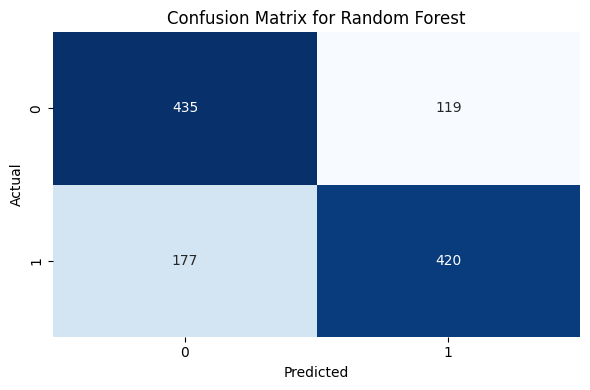

In [ ]:
cm= confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', cbar= False)

plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 5. XGBoost Classifier(Gradient Boosting)

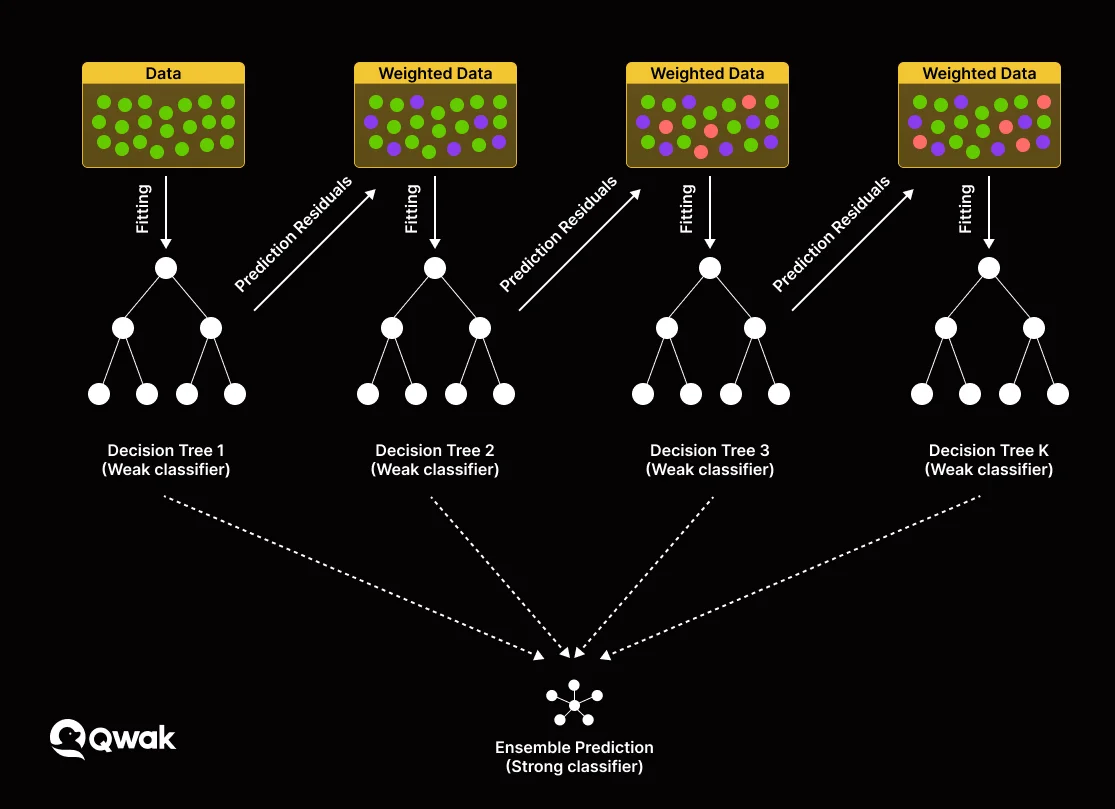

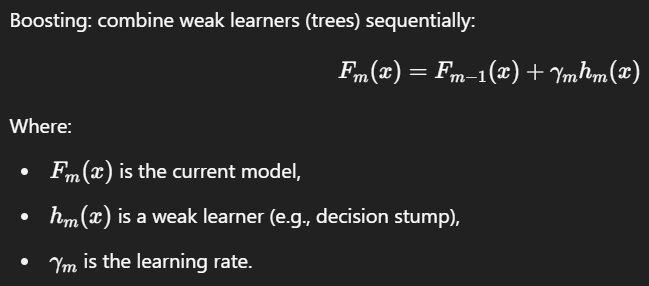

In [ ]:
from xgboost import XGBClassifier

param_grid= {
    "n_estimators": [50, 100, 150],
    'max_depth': [3,5,7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb= XGBClassifier(use_label_encoder= False, eval_metric= 'mlogloss')
grid_xgb= GridSearchCV(xgb, param_grid, cv= 5, n_jobs= -1, verbose= 1)
grid_xgb.fit(X_train, y_train)

y_pred= grid_xgb.predict(X_test)

accuracy_xgb= accuracy_score(y_test, y_pred)

print('Best Params: ', grid_xgb.best_params_)
print('XGBoost\n', classification_report(y_test, y_pred), 'Accuracy: ', accuracy_xgb)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
XGBoost
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       554
           1       0.78      0.74      0.75       597

    accuracy                           0.75      1151
   macro avg       0.75      0.75      0.75      1151
weighted avg       0.75      0.75      0.75      1151
 Accuracy:  0.7523892267593397


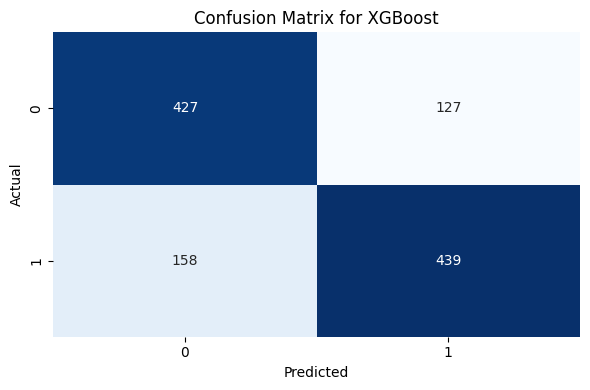

In [ ]:
cm= confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', cbar= False)

plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 6. SVM

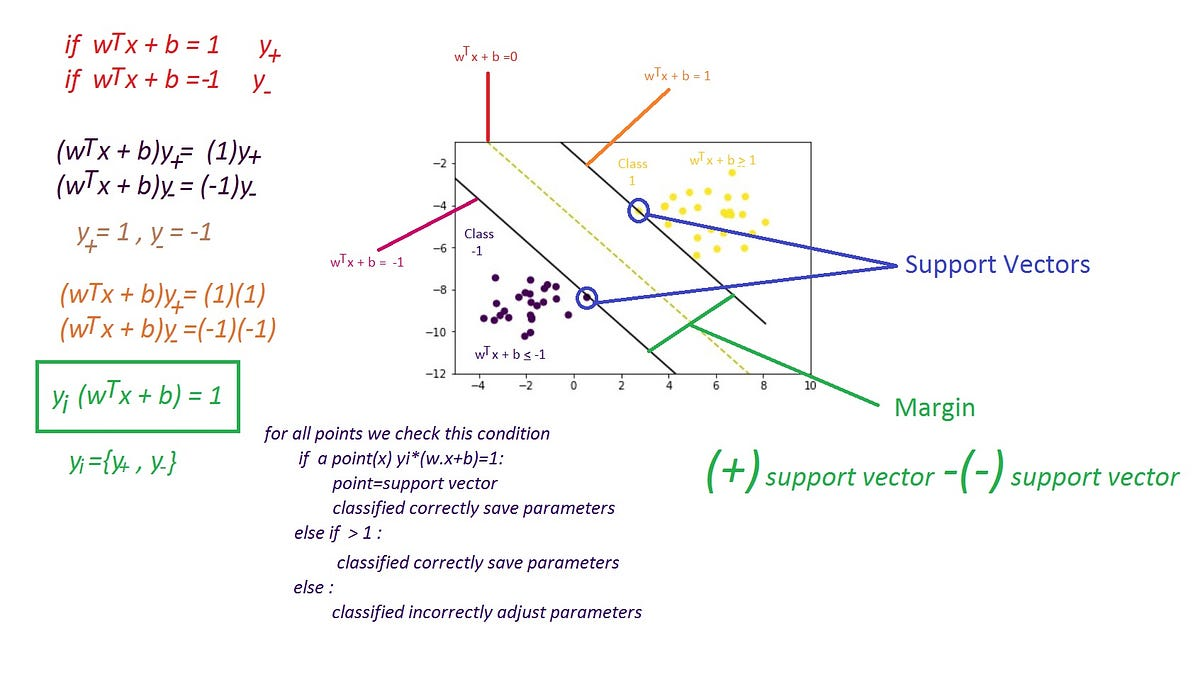

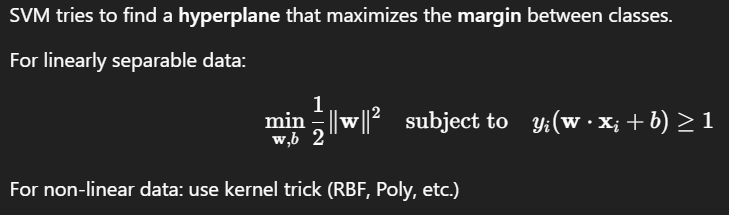

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipe_svm= Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

param_svm= {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

grid_svm= GridSearchCV(pipe_svm, param_svm, cv= 5, n_jobs= -1, verbose= 1)
grid_svm.fit(X_train, y_train)
y_pred= grid_svm.predict(X_test)

accuracy_svm= accuracy_score(y_test, y_pred)

print('SVM\n', classification_report(y_test, y_pred), 'Accuracy: ', accuracy_svm)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVM
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       554
           1       0.78      0.72      0.75       597

    accuracy                           0.75      1151
   macro avg       0.75      0.75      0.75      1151
weighted avg       0.75      0.75      0.75      1151
 Accuracy:  0.7471763683753258


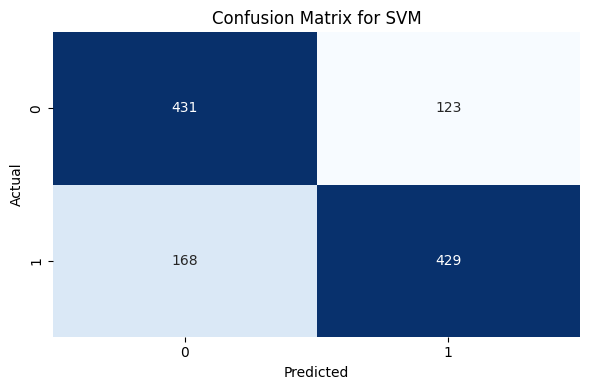

In [ ]:
cm= confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', cbar= False)

plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 7. K-Nearest Neighbors (KNN)

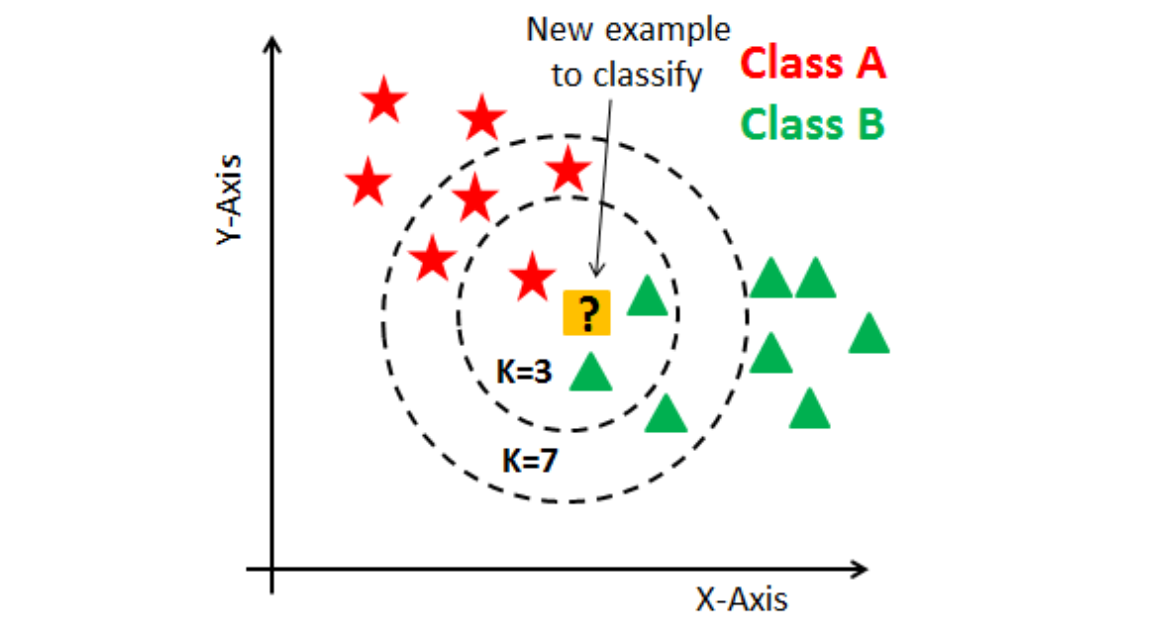

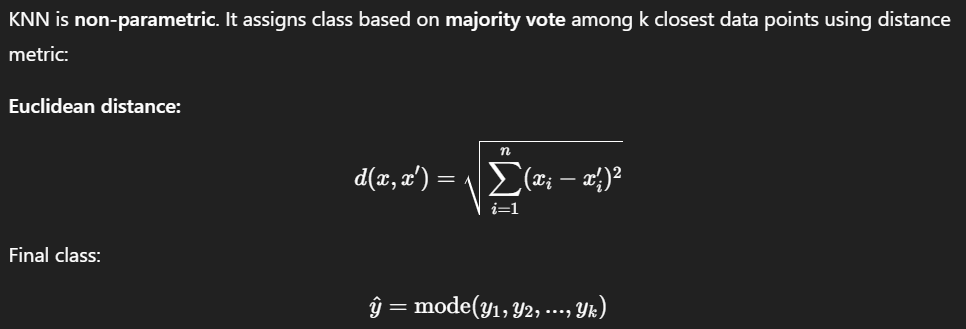

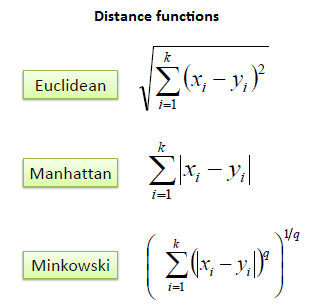

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn= Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_knn= {
    'knn__n_neighbors': [3,5,7,9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid_knn= GridSearchCV(pipe_knn, param_knn, cv= 5, n_jobs= -1, verbose= 1)
grid_knn.fit(X_train, y_train)
y_pred= grid_knn.predict(X_test)

accuracy_knn= accuracy_score(y_test, y_pred)

print('KNN\n', classification_report(y_test, y_pred), 'Accuracy: ', accuracy_knn)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
KNN
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       554
           1       0.75      0.71      0.73       597

    accuracy                           0.72      1151
   macro avg       0.72      0.73      0.72      1151
weighted avg       0.73      0.72      0.72      1151
 Accuracy:  0.7245873153779322


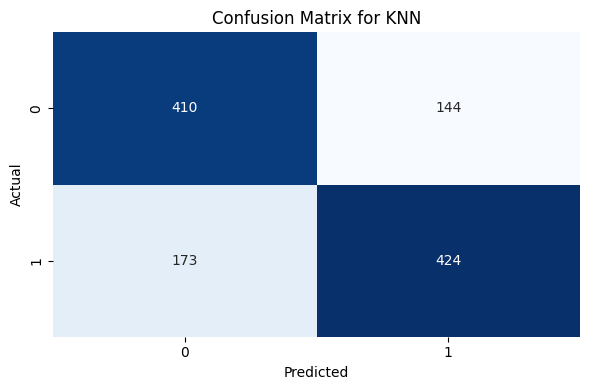

In [ ]:
cm= confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', cbar= False)

plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 8. MLPClassifier (Neural Net)

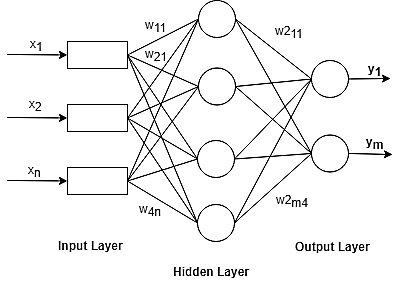

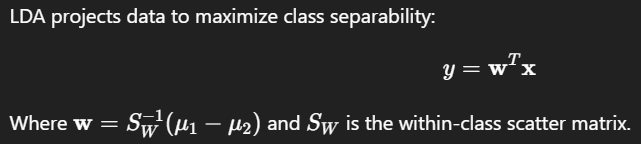

In [ ]:
from sklearn.neural_network import MLPClassifier

param_grid= {
    'hidden_layer_sizes': [(50, ), (100, ), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001]
}

mlp= MLPClassifier(max_iter= 1000, random_state= 42)
grid_mlp= GridSearchCV(mlp, param_grid, cv= 5)
grid_mlp.fit(X_train, y_train)

y_pred= grid_mlp.predict(X_test)
accuracy_mlp= accuracy_score(y_test, y_pred)

print('Best Params: ', grid_mlp.best_params_)
print('MLPClassifier\n', classification_report(y_test, y_pred), 'Accuracy: ', accuracy_mlp)

Best Params:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
MLPClassifier
               precision    recall  f1-score   support

           0       0.70      0.80      0.75       554
           1       0.79      0.69      0.73       597

    accuracy                           0.74      1151
   macro avg       0.74      0.74      0.74      1151
weighted avg       0.75      0.74      0.74      1151
 Accuracy:  0.741094700260643


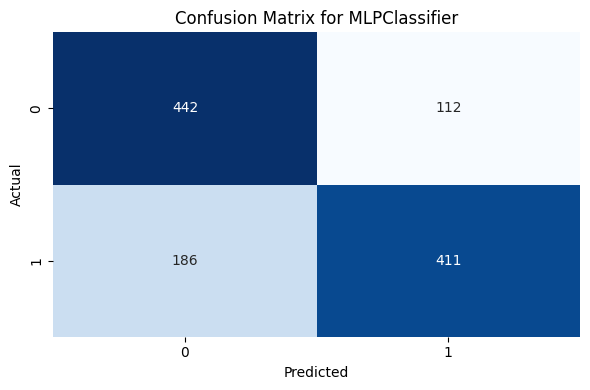

In [ ]:
cm= confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', cbar= False)

plt.title('Confusion Matrix for MLPClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 9. Linear Discriminant Analysis (LDA)

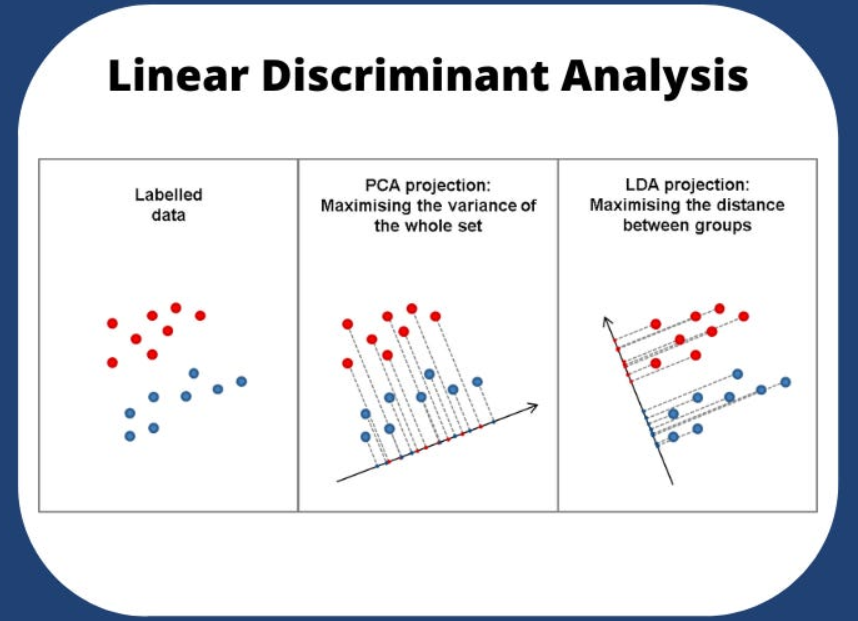

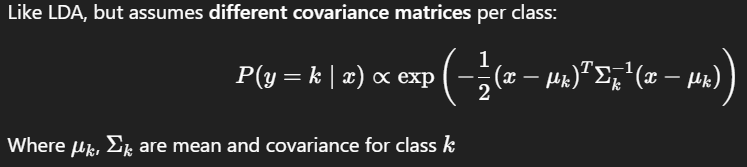

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid= {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto'] # only applies to 'lsqr' and 'eigen'
}

lda= LinearDiscriminantAnalysis()
grid_lda= GridSearchCV(lda, param_grid, cv= 5)
grid_lda.fit(X_train, y_train)

y_pred= grid_lda.predict(X_test)
accuracy_lda= accuracy_score(y_test, y_pred)

print('Best Params: ', grid_lda.best_params_)
print('Linear Discriminant Analysis: \n', classification_report(y_test, y_pred), 'Accuracy: ', accuracy_lda)

Best Params:  {'shrinkage': 'auto', 'solver': 'lsqr'}
Linear Discriminant Analysis: 
               precision    recall  f1-score   support

           0       0.69      0.79      0.73       554
           1       0.77      0.66      0.71       597

    accuracy                           0.72      1151
   macro avg       0.73      0.73      0.72      1151
weighted avg       0.73      0.72      0.72      1151
 Accuracy:  0.7245873153779322


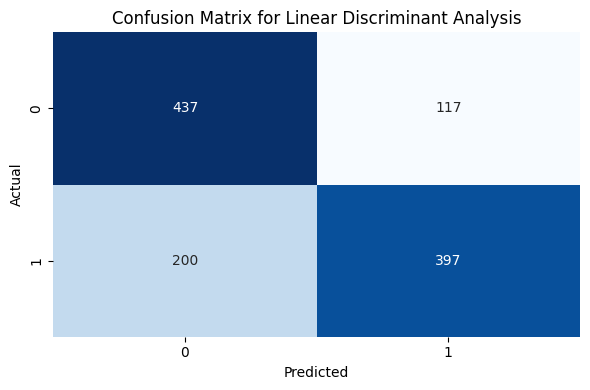

In [ ]:
cm= confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', cbar= False)

plt.title('Confusion Matrix for Linear Discriminant Analysis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## Best Performing models

In [ ]:
model_names= ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'KNN', 'MLPClassifier', 'LDA']
accuracies= [accuracy_nb, accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_svm, accuracy_knn, accuracy_mlp, accuracy_lda]

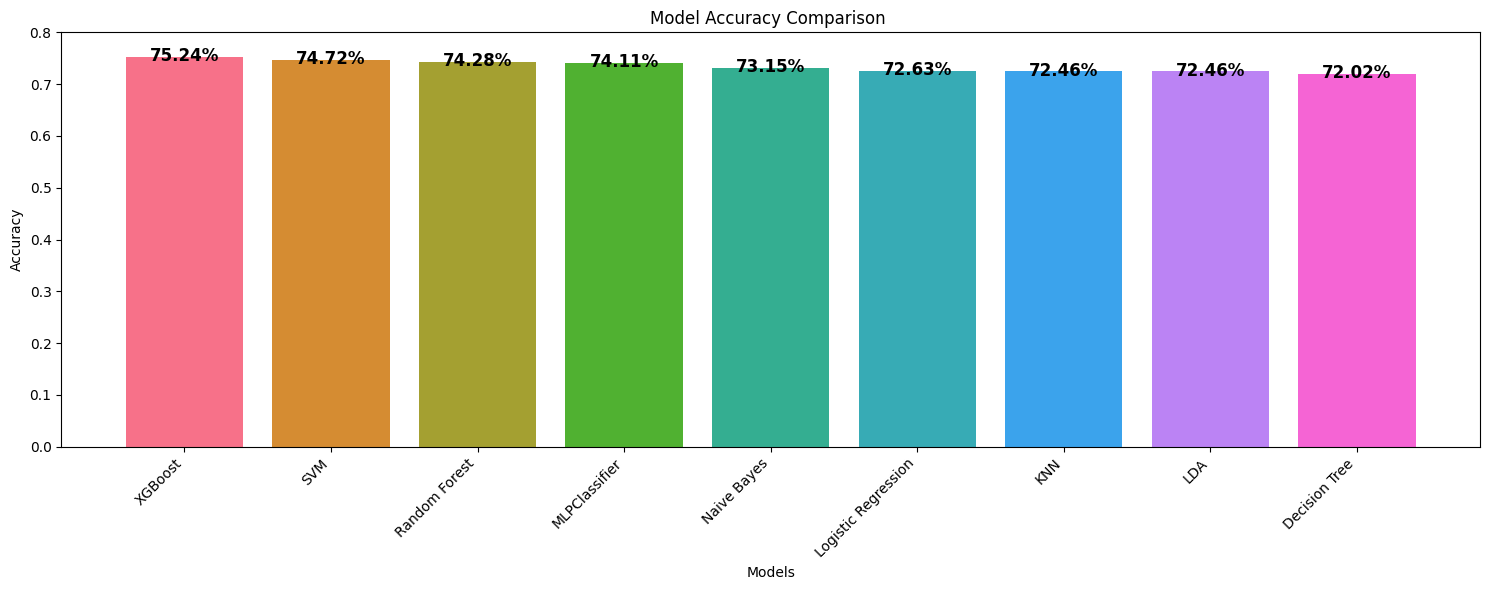

In [ ]:
# Combine model with thier accuracies
model_acc_pairs= list(zip(model_names, accuracies)) # [('Naive Bayes', 0.85), ('Logistic Regression', 0.88), ...]

# Sort by accuracy in decreasing order (change reverse=False for ascending)
sorted_pairs= sorted(model_acc_pairs, key= lambda x: x[1], reverse= True)
'''sorted(...) → sorts any iterable (like a list).
model_acc_pairs → the list we want to sort.
key=lambda x: x[1] → tells Python how to sort:
lambda x: → creates an anonymous function.
x[1] → means “use the second value in the tuple” (i.e., the accuracy).
reverse=True → sort in descending order (highest first).
Example: Before: [('A', 0.75), ('B', 0.92), ('C', 0.88)]
         After:  [('B', 0.92), ('C', 0.88), ('A', 0.75)]'''

# Unpack the sorted pairs
sorted_model_names, sorted_accuracies = zip(*sorted_pairs) # Split back into two separate lists


colors= sns.color_palette('husl', len(sorted_model_names)) # unique color for each bar

# Create a bar plot
plt.figure(figsize= (15,6))
bars= plt.bar(sorted_model_names, sorted_accuracies, color= colors)
'''plt.bar(...) → creates a vertical bar chart.
sorted_model_names → labels for each bar.
sorted_accuracies → height of each bar.
color=colors → gives each bar a unique color.
bars → stores the result so we can modify the bars later (like adding text).'''

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison ')
plt.ylim(0, 0.8) # Set the y-axis limit to ensure readibility
'''Sets the minimum of the y-axis to 0 and the maximum to 1.0 (perfect accuracy).
This ensures consistency when comparing accuracy (which is always between 0 and 1).'''

# Display accuracy percentages inside the bars
for bar, acc in zip(bars, sorted_accuracies):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()+ 0.001, f'{acc:.2%}', ha= 'center', va= 'center', fontsize= 12, fontweight='bold', color= 'black')
'''for bar, acc in zip(...) → loops over each bar and its accuracy.
bar.get_x() → gets the x-position of the bar.
bar.get_width() → how wide the bar is.
bar.get_x() + bar.get_width() / 2 → centers the text horizontally.
bar.get_height() + 0.01 → places the text slightly above the bar.
f'{acc:.2%}' → formats the number as a percentage with 2 decimals: Example: 0.8745 → 87.45%
ha='center' → horizontal alignment is center.
va='bottom' → vertical alignment starts from bottom (so it floats above bar).
fontsize=12, fontweight='bold' → makes text readable and bold.'''

plt.xticks(rotation= 45, ha= 'right')
plt.tight_layout()
plt.show()

# Saving the model for deployment

In [ ]:
# Get best params from GridSearchCV:
best_params= grid_xgb.best_params_

In [ ]:
X_full= df_scaled.drop('prognosis', axis= 1)
y_full= df['prognosis']

In [ ]:
# Retraining on full dataset
full_model= XGBClassifier(
    **best_params,
    use_label_encoder= False,
    eval_metric= 'mlogloss'
)
full_model.fit(X_full, y_full) # where X_full = X_train + X_test, y_full = y_train + y_test

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
import joblib

# Saving the best estimator from GridSearchCV
joblib.dump(full_model, 'xgboost_final_model.pkl')

print("Model Saved successfully as 'xgboost_final_model.pkl'")

Model Saved successfully as 'xgboost_final_model.pkl'
